**Recommendation quality results - Sun's KGs**

---

Recommendation test results for Sun's sfKGs, fKG (with filtering), sKGs, original KG (without filtering) for single-view approach and sKGs (without filtering) for multiview approach

# Index

1. Initial setup;

2. Filtering step results (attempt1);

3. Quality results (attempt1);

4. Cost results (attempt2).

# 1.  Initial setup

In [1]:
# Importações comuns
import numpy as np
import os
import pandas as pd # pandas is a data manipulation library
import random

In [2]:
# Para plotar figuras
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

[Confira aqui](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.rc.html) a documentação do matplotlib.rc

In [3]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR)

def save_fig(fig_id, tight_layout=True, fig_extension="eps", resolution=1200):
    path = os.path.join(IMAGES_PATH, "Fig_" + fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:

# Ignorar warnings desnecessários (ver SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# 2. Filtering step results (attempt1)

In [43]:
df_sv_sfKG=pd.DataFrame({'x': np.array([1,2]),
                 '25_orig': np.array([9421,2956]),
                 '25_fil': np.array([5844,1818]),
                 '25_unseen': np.array([5723,1744]),
                 '50_orig': np.array([9706,4237]),
                 '50_fil': np.array([4262,1721]),
                 '50_unseen': np.array([4047,1593]),
                 '75_orig': np.array([11015,5518]),
                 '75_fil': np.array([4231,1718]),
                 '75_unseen': np.array([3989,1569]),         
                 '100_orig': np.array([12311,6799]),
                 '100_fil': np.array([4231,1718]),
                 '100_unseen': np.array([3989,1569])
                     })

df_sv_sKG=pd.DataFrame({'x': np.array([1,2]),
                 '25_orig': np.array([9421,2956]),
                 '25_fil': np.array([9420,2956]),
                 '25_unseen': np.array([9228,2821]),
                 '50_orig': np.array([9706,4237]),
                 '50_fil': np.array([9705,4237]),
                 '50_unseen': np.array([9179,3793]),
                 '75_orig': np.array([11015,5518]),
                 '75_fil': np.array([11015,5518]),
                 '75_unseen': np.array([10157,4754]),
                 '100_orig': np.array([12311,6799]),
                 '100_fil': np.array([12311,6799]),
                 '100_unseen': np.array([11043,5630])
                     })



df_mv_sKG=pd.DataFrame({'x': np.array([1,2]),
                 '25_orig': np.array([8681,2957]),
                 '25_fil': np.array([8681,2957]),
                 '25_unseen': np.array([8468,2811]),
                 '50_orig': np.array([9938,4238]),
                 '50_fil': np.array([9938,4238]),
                 '50_unseen': np.array([9456,3850]),
                 '75_orig': np.array([11120,5519]),
                 '75_fil': np.array([11120,5519]),
                 '75_unseen': np.array([10253,4740]),
                 '100_orig': np.array([12311,6799]),
                 '100_fil': np.array([12311,6799]),
                 '100_unseen': np.array([11043,5630])
                     })



df_mv_sfKG=pd.DataFrame({'x': np.array([1,2]),
                 '25_orig': np.array([8681,2957]),
                 '25_fil': np.array([4945,1801]),
                 '25_unseen': np.array([4733,1667]),
                 '50_orig': np.array([9938,4238]),
                 '50_fil': np.array([4074,1714]),
                 '50_unseen': np.array([3834,1564]),
                 '75_orig': np.array([11123,5519]),
                 '75_fil': np.array([4163,1714]),
                 '75_unseen': np.array([3963,1590]),
                 '100_orig': np.array([12311,6799]),
                 '100_fil': np.array([4231,1718]),
                 '100_unseen': np.array([3989,1569])
                     })


In [46]:
def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 3, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
        
def plot_filtering_results(df):#df_sv_sfKG, df_sv_sKG, df_mv_sKG):
    labels = ['#Triples', '#Nodes']
    x = np.arange(len(labels))  # the label locations
    width = 0.25  # the width of the bars

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,15))

    orig = df['25_orig']
    fil = df['25_fil']
    unseen = df['25_unseen']
    rects1 = ax1.bar(x - width, orig, width, label='Before')
    rects2 = ax1.bar(x, fil, width, label='Infrequent')
    rects3 = ax1.bar(x + width, unseen, width, label='Unseen')
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax1.set_ylabel('Count')
    ax1.set_title('25%')
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels)
    #ax1.legend()
    autolabel(rects1, ax1)
    autolabel(rects2, ax1)
    autolabel(rects3, ax1)
    
    orig = df['50_orig']
    fil = df['50_fil']
    unseen = df['50_unseen']
    rects1 = ax2.bar(x - width, orig, width, label='Before')
    rects2 = ax2.bar(x, fil, width, label='Infrequent')
    rects3 = ax2.bar(x + width, unseen, width, label='Unseen')
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax2.set_ylabel('Count')
    ax2.set_title('50%')
    ax2.set_xticks(x)
    ax2.set_xticklabels(labels)
    ax2.legend()
    autolabel(rects1, ax2)
    autolabel(rects2, ax2)
    autolabel(rects3, ax2)
    
    orig = df['75_orig']
    fil = df['75_fil']
    unseen = df['75_unseen']    
    rects1 = ax3.bar(x - width, orig, width, label='Before')
    rects2 = ax3.bar(x, fil, width, label='Infrequent')
    rects3 = ax3.bar(x + width, unseen, width, label='Unseen')
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax3.set_ylabel('Count')
    ax3.set_title('75%')
    ax3.set_xticks(x)
    ax3.set_xticklabels(labels)
    ax3.legend()
    autolabel(rects1, ax3)
    autolabel(rects2, ax3)
    autolabel(rects3, ax3)
    
    orig = df['100_orig']
    fil = df['100_fil']
    unseen = df['100_unseen']
    rects1 = ax4.bar(x - width, orig, width, label='Before')
    rects2 = ax4.bar(x, fil, width, label='Infrequent')
    rects3 = ax4.bar(x + width, unseen, width, label='Unseen')
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax4.set_ylabel('Count')
    ax4.set_title('100%')
    ax4.set_xticks(x)
    ax4.set_xticklabels(labels)
    ax4.legend()
    autolabel(rects1, ax4)
    autolabel(rects2, ax4)
    autolabel(rects3, ax4)

    fig.tight_layout()

    plt.show()
    
    #plt.savefig('./Fig5.eps', format='eps', dpi=1200)
    
    
def plot_all_filtering_results(df_sv_sfKG, df_sv_sKG, df_mv_sKG, df_mv_sfKG):
    labels = ['#Triples', '#Nodes']
    x = np.arange(len(labels))  # the label locations
    width = 0.3  # the width of the bars

    fig, ((ax1, ax2, ax3, ax4),
          (ax5, ax6, ax7, ax8),  
          (ax9, ax10, ax11, ax12),
          (ax13, ax14, ax15, ax16)) = plt.subplots(4, 4, sharex=True, 
                                                  sharey=True, squeeze=True,
                                                  figsize=(14,11),
                                                  gridspec_kw={'hspace': 0.1, 'wspace': 0.1})

    df = df_sv_sKG
    
    orig = df['25_orig']
    fil = df['25_fil']
    unseen = df['25_unseen']
    rects1 = ax1.bar(x - width, orig, width, label='Before')
    rects2 = ax1.bar(x, fil, width, label='Infrequent')
    rects3 = ax1.bar(x + width, unseen, width, label='Unseen')
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax1.set_ylabel('Single-view sKG')
    ax1.set_title('25%')
    #ax1.set_xticks(x)
    #ax1.set_xticklabels(labels)
#     ax1.legend()
    autolabel(rects1, ax1)
    autolabel(rects2, ax1)
    autolabel(rects3, ax1)
    
    orig = df['50_orig']
    fil = df['50_fil']
    unseen = df['50_unseen']
    rects1 = ax2.bar(x - width, orig, width, label='Before')
    rects2 = ax2.bar(x, fil, width, label='Infrequent')
    rects3 = ax2.bar(x + width, unseen, width, label='Unseen')
    # Add some text for labels, title and custom x-axis tick labels, etc.
    #ax2.set_ylabel('Count')
    ax2.set_title('50%')
    #ax2.set_xticks(x)
    #ax2.set_xticklabels(labels)
    #ax2.legend()
    autolabel(rects1, ax2)
    autolabel(rects2, ax2)
    autolabel(rects3, ax2)
    
    orig = df['75_orig']
    fil = df['75_fil']
    unseen = df['75_unseen']    
    rects1 = ax3.bar(x - width, orig, width, label='Before')
    rects2 = ax3.bar(x, fil, width, label='Infrequent')
    rects3 = ax3.bar(x + width, unseen, width, label='Unseen')
    # Add some text for labels, title and custom x-axis tick labels, etc.
    #ax3.set_ylabel('Count')
    ax3.set_title('75%')
    #ax3.set_xticks(x)
    #ax3.set_xticklabels(labels)
    #ax3.legend()
    autolabel(rects1, ax3)
    autolabel(rects2, ax3)
    autolabel(rects3, ax3)
    
    orig = df['100_orig']
    fil = df['100_fil']
    unseen = df['100_unseen']
    rects1 = ax4.bar(x - width, orig, width, label='Before')
    rects2 = ax4.bar(x, fil, width, label='Infrequent')
    rects3 = ax4.bar(x + width, unseen, width, label='Unseen')
    # Add some text for labels, title and custom x-axis tick labels, etc.
    #ax4.set_ylabel('Count')
    ax4.set_title('100%')
    #ax4.set_xticks(x)
    #ax4.set_xticklabels(labels)
    #ax4.legend()
    autolabel(rects1, ax4)
    autolabel(rects2, ax4)
    autolabel(rects3, ax4)

    df = df_sv_sfKG
    
    orig = df['25_orig']
    fil = df['25_fil']
    unseen = df['25_unseen']
    rects1 = ax5.bar(x - width, orig, width, label='Before')
    rects2 = ax5.bar(x, fil, width, label='Infrequent')
    rects3 = ax5.bar(x + width, unseen, width, label='Unseen')
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax5.set_ylabel('Single-view sfKG')
    #ax5.set_title('25%')
    #ax5.set_xticks(x)
    #ax5.set_xticklabels(labels)
    #ax5.legend()
    autolabel(rects1, ax5)
    autolabel(rects2, ax5)
    autolabel(rects3, ax5)
    
    orig = df['50_orig']
    fil = df['50_fil']
    unseen = df['50_unseen']
    rects1 = ax6.bar(x - width, orig, width, label='Before')
    rects2 = ax6.bar(x, fil, width, label='Infrequent')
    rects3 = ax6.bar(x + width, unseen, width, label='Unseen')
    # Add some text for labels, title and custom x-axis tick labels, etc.
#     ax6.set_ylabel('Count')
#     ax6.set_title('50%')
#     ax6.set_xticks(x)
#     ax6.set_xticklabels(labels)
#     ax6.legend()
    autolabel(rects1, ax6)
    autolabel(rects2, ax6)
    autolabel(rects3, ax6)
    
    orig = df['75_orig']
    fil = df['75_fil']
    unseen = df['75_unseen']    
    rects1 = ax7.bar(x - width, orig, width, label='Before')
    rects2 = ax7.bar(x, fil, width, label='Infrequent')
    rects3 = ax7.bar(x + width, unseen, width, label='Unseen')
    # Add some text for labels, title and custom x-axis tick labels, etc.
#     ax7.set_ylabel('Count')
#     ax7.set_title('75%')
#     ax7.set_xticks(x)
#     ax7.set_xticklabels(labels)
#     ax7.legend()
    autolabel(rects1, ax7)
    autolabel(rects2, ax7)
    autolabel(rects3, ax7)
    
    orig = df['100_orig']
    fil = df['100_fil']
    unseen = df['100_unseen']
    rects1 = ax8.bar(x - width, orig, width, label='Before')
    rects2 = ax8.bar(x, fil, width, label='Infrequent')
    rects3 = ax8.bar(x + width, unseen, width, label='Unseen')
    # Add some text for labels, title and custom x-axis tick labels, etc.
#     ax8.set_ylabel('Count')
#     ax8.set_title('100%')
#     ax8.set_xticks(x)
#     ax8.set_xticklabels(labels)
#     ax8.legend()
    autolabel(rects1, ax8)
    autolabel(rects2, ax8)
    autolabel(rects3, ax8)

    df = df_mv_sKG
    
    orig = df['25_orig']
    fil = df['25_fil']
    unseen = df['25_unseen']
    rects1 = ax9.bar(x - width, orig, width, label='Before')
    rects2 = ax9.bar(x, fil, width, label='Infrequent')
    rects3 = ax9.bar(x + width, unseen, width, label='Unseen')
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax9.set_ylabel('Multi-view sKG')
#     ax9.set_title('25%')
#     ax9.set_xticks(x)
#     ax9.set_xticklabels(labels)
#     ax9.legend()
    autolabel(rects1, ax9)
    autolabel(rects2, ax9)
    autolabel(rects3, ax9)
    
    orig = df['50_orig']
    fil = df['50_fil']
    unseen = df['50_unseen']
    rects1 = ax10.bar(x - width, orig, width, label='Before')
    rects2 = ax10.bar(x, fil, width, label='Infrequent')
    rects3 = ax10.bar(x + width, unseen, width, label='Unseen')
    # Add some text for labels, title and custom x-axis tick labels, etc.
#     ax10.set_ylabel('Count')
#     ax10.set_title('50%')
#     ax10.set_xticks(x)
#     ax10.set_xticklabels(labels)
#     ax10.legend()
    autolabel(rects1, ax10)
    autolabel(rects2, ax10)
    autolabel(rects3, ax10)
    
    orig = df['75_orig']
    fil = df['75_fil']
    unseen = df['75_unseen']    
    rects1 = ax11.bar(x - width, orig, width, label='Before')
    rects2 = ax11.bar(x, fil, width, label='Infrequent')
    rects3 = ax11.bar(x + width, unseen, width, label='Unseen')
    # Add some text for labels, title and custom x-axis tick labels, etc.
#     ax11.set_ylabel('Count')
#     ax11.set_title('75%')
#     ax11.set_xticks(x)
#     ax11.set_xticklabels(labels)
#     ax11.legend()
    autolabel(rects1, ax11)
    autolabel(rects2, ax11)
    autolabel(rects3, ax11)
    
    orig = df['100_orig']
    fil = df['100_fil']
    unseen = df['100_unseen']
    rects1 = ax12.bar(x - width, orig, width, label='Before')
    rects2 = ax12.bar(x, fil, width, label='Infrequent')
    rects3 = ax12.bar(x + width, unseen, width, label='Unseen')
    # Add some text for labels, title and custom x-axis tick labels, etc.
#     ax12.set_ylabel('Count')
#     ax12.set_title('100%')
#    ax12.set_xticks(x)
#    ax12.set_xticklabels(labels)
#     ax12.legend()
    autolabel(rects1, ax12)
    autolabel(rects2, ax12)
    autolabel(rects3, ax12)

    df = df_mv_sfKG
    
    orig = df['25_orig']
    fil = df['25_fil']
    unseen = df['25_unseen']
    rects1 = ax13.bar(x - width, orig, width, label='Before')
    rects2 = ax13.bar(x, fil, width, label='Infrequent')
    rects3 = ax13.bar(x + width, unseen, width, label='Unseen')
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax13.set_ylabel('Multi-view sfKG')
#     ax13.set_title('25%')
#     ax13.set_xticks(x)
#     ax13.set_xticklabels(labels)
#     ax13.legend()
    autolabel(rects1, ax13)
    autolabel(rects2, ax13)
    autolabel(rects3, ax13)
    
    orig = df['50_orig']
    fil = df['50_fil']
    unseen = df['50_unseen']
    rects1 = ax14.bar(x - width, orig, width, label='Before filtering')
    rects2 = ax14.bar(x, fil, width, label='Infrequent entity filtering')
    rects3 = ax14.bar(x + width, unseen, width, label='Unseen entity filtering')
    # Add some text for labels, title and custom x-axis tick labels, etc.
#     ax14.set_ylabel('Count')
#     ax14.set_title('50%')
#     ax14.set_xticks(x)
#     ax14.set_xticklabels(labels)
#     ax14.legend()
    autolabel(rects1, ax14)
    autolabel(rects2, ax14)
    autolabel(rects3, ax14)
    
    orig = df['75_orig']
    fil = df['75_fil']
    unseen = df['75_unseen']    
    rects1 = ax15.bar(x - width, orig, width, label='Before')
    rects2 = ax15.bar(x, fil, width, label='Infrequent')
    rects3 = ax15.bar(x + width, unseen, width, label='Unseen')
    # Add some text for labels, title and custom x-axis tick labels, etc.
#     ax15.set_ylabel('Count')
#     ax15.set_title('75%')
#     ax15.set_xticks(x)
#     ax15.set_xticklabels(labels)
#     ax15.legend()
    autolabel(rects1, ax15)
    autolabel(rects2, ax15)
    autolabel(rects3, ax15)
    
    orig = df['100_orig']
    fil = df['100_fil']
    unseen = df['100_unseen']
    rects1 = ax16.bar(x - width, orig, width, label='Before')
    rects2 = ax16.bar(x, fil, width, label='Infrequent')
    rects3 = ax16.bar(x + width, unseen, width, label='Unseen')
    # Add some text for labels, title and custom x-axis tick labels, etc.
#     ax16.set_ylabel('Count')
#     ax16.set_title('100%')
    ax16.set_xticks(x)
    ax16.set_xticklabels(labels)
#     ax16.legend()
    autolabel(rects1, ax16)
    autolabel(rects2, ax16)
    autolabel(rects3, ax16)

    legend_x = 1.03
    legend_y = -0.4
    ax14.legend(loc='lower center', ncol=3, bbox_to_anchor=(legend_x, legend_y), fontsize=12)
    
    fig.tight_layout()

    plt.savefig('./Fig5.eps', format='eps', dpi=1200)
    
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:371: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


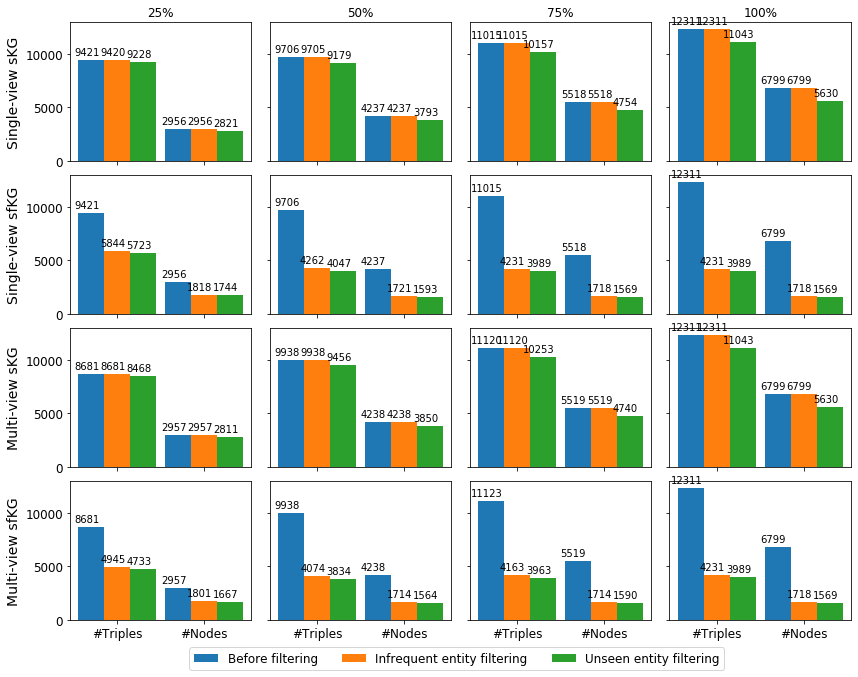

In [47]:
plot_all_filtering_results(df_sv_sfKG, df_sv_sKG, df_mv_sKG, df_mv_sfKG)

# 3. Quality results (attempt1)

In [5]:
# CFKG Data
df_cfkg=pd.DataFrame({'xi': list(range(4)),
                 'sv_sfKGs_p': np.array([0.269671,0.284624,0.296182,0.283987]),
                 'sv_sfKGs_r': np.array([0.14983,0.151864,0.154544,0.14983]),
                 'sv_sfKGs_ndcg': np.array([0.58767,0.605255,0.615024,0.600072]),
                 'sv_sfKGs_map': np.array([0.481751,0.498066,0.511686,0.492823]),
                 'sv_sKGs_p': np.array([0.224284,0.228314,0.222694,0.221209]),
                 'sv_sKGs_r': np.array([0.119648,0.119824,0.117702,0.114755]),
                 'sv_sKGs_ndcg': np.array([0.535341,0.538403,0.536852,0.527897]),
                 'sv_sKGs_map': np.array([0.428203,0.433338,0.425452,0.420693]),
                 'mv_sKGs_p': np.array([0.237858,0.226935,0.228102,0.221209]),
                 'mv_sKGs_r': np.array([0.125312,0.118202,0.116994,0.114755]),
                 'mv_sKGs_ndcg': np.array([0.545497,0.524718,0.529546,0.527897]),
                 'mv_sKGs_map': np.array([0.432747,0.41219,0.416657,0.420693]),
                 'mv_sfKGs_p': np.array([ 0.284836,0.291516,0.288759,0.283987]),
                 'mv_sfKGs_r': np.array([0.14897, 0.154978,0.154097, 0.14983]),
                 'mv_sfKGs_ndcg': np.array([0.594801,0.611844,0.610569,0.600072]),
                 'mv_sfKGs_map': np.array([0.486462,0.503609,0.501314,0.492823])
                     })

# CKE Data
df_cke=pd.DataFrame({'xi': list(range(4)),
                 'sv_sfKGs_p': np.array([0.538706,0.52895,0.534358,0.530541]),
                 'sv_sfKGs_r': np.array([0.300765,0.293092,0.300047,0.296802]),
                 'sv_sfKGs_ndcg': np.array([0.876892,0.878509,0.883875,0.868269]),
                 'sv_sfKGs_map': np.array([0.840523,0.848144,0.849255,0.832292]),
                 'sv_sKGs_p': np.array([0.541569,0.531495,0.5382825,0.532662]),
                 'sv_sKGs_r': np.array([0.301097,0.30099,0.306846,0.296345]),
                 'sv_sKGs_ndcg': np.array([0.871604,0.863927,0.873578,0.862646]),
                 'sv_sKGs_map': np.array([0.837955,0.827951,0.841799,0.828263]),
                 'mv_sKGs_p': np.array([0.539555,0.537328,0.538388,0.532662]),
                 'mv_sKGs_r': np.array([0.304615,0.299294,0.30076,0.296345]),
                 'mv_sKGs_ndcg': np.array([0.885739,0.885164,0.876146,0.862646]),
                 'mv_sKGs_map': np.array([0.855752,0.853097,0.844523,0.828263]),
                 'mv_sfKGs_p': np.array([0.534889,0.535419,0.536373,0.530541]),
                 'mv_sfKGs_r': np.array([0.296519,0.303121,0.298459,0.296802]),
                 'mv_sfKGs_ndcg': np.array([0.866119,0.875393,0.890183,0.868269]),
                 'mv_sfKGs_map': np.array([0.830825,0.838156,0.863346,0.832292])
                     })


# CoFM Data
df_cofm=pd.DataFrame({'xi': list(range(4)),
                 'sv_sfKGs_p': np.array([0.517285,0.539767,0.525451,0.534783]),
                 'sv_sfKGs_r': np.array([0.293846,0.307759,0.299246,0.304709]),
                 'sv_sfKGs_ndcg': np.array([0.824707,0.845836,0.833019,0.844842]),
                 'sv_sfKGs_map': np.array([0.757612,0.788935,0.767553,0.789015]),
                 'sv_sKGs_p': np.array([0.523118,0.534889,0.53298,0.541463]),
                 'sv_sKGs_r': np.array([0.298055,0.307089,0.304019,0.309153]),
                 'sv_sKGs_ndcg': np.array([0.819159,0.84514,0.83923,0.854973]),
                 'sv_sKGs_map': np.array([0.74927,0.785005,0.781046,0.79769]),
                 'mv_sKGs_p': np.array([0.51527,0.527253,0.524814,0.541463]),
                 'mv_sKGs_r': np.array([0.288925,0.295637,0.298805,0.309153]),
                 'mv_sKGs_ndcg': np.array([0.821674,0.840645,0.831107,0.854973]),
                 'mv_sKGs_map': np.array([0.759808,0.779187,0.76663,0.79769]),
                 'mv_sfKGs_p': np.array([0.525451,0.548568,0.520255,0.534783]),
                 'mv_sfKGs_r': np.array([0.29533,0.313863,0.294838,0.304709]),
                 'mv_sfKGs_ndcg': np.array([0.825756,0.847125,0.828692,0.844842]),
                 'mv_sfKGs_map': np.array([0.762819,0.792415,0.76534,0.789015])
                     })

# KTUP Data
df_ktup=pd.DataFrame({'xi': list(range(4)),
                 'sv_sfKGs_p': np.array([0.561718,0.560657,0.560127,0.555567]),
                 'sv_sfKGs_r': np.array([0.317749,0.3209,0.314789,0.318238]),
                 'sv_sfKGs_ndcg': np.array([0.885198,0.891879,0.901077,0.891458]),
                 'sv_sfKGs_map': np.array([0.85183,0.863027,0.872417,0.860759]),
                 'sv_sKGs_p': np.array([0.559491,0.555673,0.564263,0.547826]),
                 'sv_sKGs_r': np.array([0.31708,0.312888,0.319879,0.306531]),
                 'sv_sKGs_ndcg': np.array([0.899475,0.892528,0.897406,0.87465]),
                 'sv_sKGs_map': np.array([0.870696,0.863553,0.872628,0.841813]),
                 'mv_sKGs_p': np.array([0.556416,0.551856,0.565536,0.5478260]),
                 'mv_sKGs_r': np.array([0.313892,0.309662,0.319045,0.306531]),
                 'mv_sKGs_ndcg': np.array([0.89082,0.884065,0.903079,0.87465]),
                 'mv_sKGs_map': np.array([0.858994,0.853861,0.876643,0.841813]),
                 'mv_sfKGs_p': np.array([0.561718,0.562354,0.554931,0.555567]),
                 'mv_sfKGs_r': np.array([0.319229,0.31734,0.308783,0.318238]),
                 'mv_sfKGs_ndcg': np.array([0.897417,0.894142,0.88075,0.891458]),
                 'mv_sfKGs_map': np.array([0.86917,0.867819,0.851279,0.860759])
                     })


In [6]:
df_ktup.head()

,xi,sv_sfKGs_p,sv_sfKGs_r,sv_sfKGs_ndcg,sv_sfKGs_map,sv_sKGs_p,sv_sKGs_r,sv_sKGs_ndcg,sv_sKGs_map,mv_sKGs_p,mv_sKGs_r,mv_sKGs_ndcg,mv_sKGs_map,mv_sfKGs_p,mv_sfKGs_r,mv_sfKGs_ndcg,mv_sfKGs_map
0,0,0.561718,0.317749,0.885198,0.851830,0.559491,0.317080,0.899475,0.870696,0.556416,0.313892,0.890820,0.858994,0.561718,0.319229,0.897417,0.869170
1,1,0.560657,0.320900,0.891879,0.863027,0.555673,0.312888,0.892528,0.863553,0.551856,0.309662,0.884065,0.853861,0.562354,0.317340,0.894142,0.867819
2,2,0.560127,0.314789,0.901077,0.872417,0.564263,0.319879,0.897406,0.872628,0.565536,0.319045,0.903079,0.876643,0.554931,0.308783,0.880750,0.851279
3,3,0.555567,0.318238,0.891458,0.860759,0.547826,0.306531,0.874650,0.841813,0.547826,0.306531,0.874650,0.841813,0.555567,0.318238,0.891458,0.860759


In [7]:
def plot_all_results(df_cfkg, df_cke, df_cofm, df_ktup):
    rates = ['25%','50%','75%','100%']
    xi = df_cfkg['xi']
   
    fig, ((ax1, ax2),
          (ax3, ax4)) = plt.subplots(2, 2, figsize=(14,12),
                                     sharex=True, sharey=False, squeeze=False,
                                     gridspec_kw={'hspace': 0.15, 'wspace': 0.15})
    
    #fig.suptitle('Recommendation Quality Results')
    
        # Precision (p)
    #CFKG
#     ax1.plot('xi', 'sv_sfKGs_p', data=df_cfkg, marker='o', markerfacecolor='blue', markersize=8, linestyle='dashed', color='blue', linewidth=1, label="Singleview sfKG CFKG")
#     ax1.plot('xi', 'sv_sKGs_p', data=df_cfkg, marker='o', markersize=8, linestyle='solid', color='red', linewidth=1, label="Singleview sKG CFKG")
#     ax1.plot('xi', 'mv_sKGs_p', data=df_cfkg, marker='o', markersize=8, linestyle='dotted', color='olive', linewidth=1, label="Multi-view sKG CFKG")
    #CKE
    ax1.plot('xi', 'sv_sfKGs_p', data=df_cke, marker='^', markerfacecolor='blue', markersize=8, linestyle='dashed', color='blue', linewidth=1, label="Singleview sfKG CKE")
    ax1.plot('xi', 'sv_sKGs_p', data=df_cke, marker='^', markersize=8, linestyle='solid', color='red', linewidth=1, label="Singleview sKG CKE")
    ax1.plot('xi', 'mv_sKGs_p', data=df_cke, marker='^', markersize=8, linestyle='dotted', color='olive', linewidth=1, label="Multi-view sKG CKE")
    #CoFM
    ax1.plot('xi', 'sv_sfKGs_p', data=df_cofm, marker='s', markerfacecolor='blue', markersize=8, linestyle='dashed', color='blue', linewidth=1, label="Singleview sfKG CoFM")
    ax1.plot('xi', 'sv_sKGs_p', data=df_cofm, marker='s', markersize=8, linestyle='solid', color='red', linewidth=1, label="Singleview sKG CoFM")
    ax1.plot('xi', 'mv_sKGs_p', data=df_cofm, marker='s', markersize=8, linestyle='dotted', color='olive', linewidth=1, label="Multi-view sKG CoFM")
    #KTUP
    ax1.plot('xi', 'sv_sfKGs_p', data=df_ktup, marker='X', markerfacecolor='blue', markersize=8, linestyle='dashed', color='blue', linewidth=1, label="Singleview sfKG KTUP")
    ax1.plot('xi', 'sv_sKGs_p', data=df_ktup, marker='X', markersize=8, linestyle='solid', color='red', linewidth=1, label="Singleview sKG KTUP")
    ax1.plot('xi', 'mv_sKGs_p', data=df_ktup, marker='X', markersize=8, linestyle='dotted', color='olive', linewidth=1, label="Multi-view sKG KTUP")
#     ax1.legend()
    #ax1.set_title('p')
    ax1.set(title='p')
    ax1.set_xticks(xi, minor=False)
    ax1.set_xticklabels(rates, fontdict=None, minor=False)
    plt.setp(ax1.get_xticklabels(), visible=False)

 
        # Recall (r)
    #CFKG
#     ax2.plot('xi', 'sv_sfKGs_r', data=df_cfkg, marker='o', markerfacecolor='blue', markersize=8, linestyle='dashed', color='blue', linewidth=1, label="Singleview sfKG CFKG")
#     ax2.plot('xi', 'sv_sKGs_r', data=df_cfkg, marker='o', markersize=8, linestyle='solid', color='red', linewidth=1, label="Singleview sKG CFKG")
#     ax2.plot('xi', 'mv_sKGs_r', data=df_cfkg, marker='o', markersize=8, linestyle='dotted', color='olive', linewidth=1, label="Multi-view sKG CFKG")
    #CKE
    ax2.plot('xi', 'sv_sfKGs_r', data=df_cke, marker='^', markerfacecolor='blue', markersize=8, linestyle='dashed', color='blue', linewidth=1, label="Singleview sfKG CKE")
    ax2.plot('xi', 'sv_sKGs_r', data=df_cke, marker='^', markersize=8, linestyle='solid', color='red', linewidth=1, label="Singleview sKG CKE")
    ax2.plot('xi', 'mv_sKGs_r', data=df_cke, marker='^', markersize=8, linestyle='dotted', color='olive', linewidth=1, label="Multi-view sKG CKE")
    #CoFM
    ax2.plot('xi', 'sv_sfKGs_r', data=df_cofm, marker='s', markerfacecolor='blue', markersize=8, linestyle='dashed', color='blue', linewidth=1, label="Singleview sfKG CoFM")
    ax2.plot('xi', 'sv_sKGs_r', data=df_cofm, marker='s', markersize=8, linestyle='solid', color='red', linewidth=1, label="Singleview sKG CoFM")
    ax2.plot('xi', 'mv_sKGs_r', data=df_cofm, marker='s', markersize=8, linestyle='dotted', color='olive', linewidth=1, label="Multi-view sKG CoFM")
    #KTUP
    ax2.plot('xi', 'sv_sfKGs_r', data=df_ktup, marker='X', markerfacecolor='blue', markersize=8, linestyle='dashed', color='blue', linewidth=1, label="Singleview sfKG KTUP")
    ax2.plot('xi', 'sv_sKGs_r', data=df_ktup, marker='X', markersize=8, linestyle='solid', color='red', linewidth=1, label="Singleview sKG KTUP")
    ax2.plot('xi', 'mv_sKGs_r', data=df_ktup, marker='X', markersize=8, linestyle='dotted', color='olive', linewidth=1, label="Multi-view sKG KTUP")
    #ax2.legend()
    #ax2.set_title('r')
    ax2.set(title='r')
    ax2.set_xticks(xi, minor=False)
    ax2.set_xticklabels(rates, fontdict=None, minor=False)
    plt.setp(ax2.get_xticklabels(), visible=False)

        # nDCG
    #CFKG
#     ax3.plot('xi', 'sv_sfKGs_ndcg', data=df_cfkg, marker='o', markerfacecolor='blue', markersize=8, linestyle='dashed', color='blue', linewidth=1, label="Singleview sfKG CFKG")
#     ax3.plot('xi', 'sv_sKGs_ndcg', data=df_cfkg, marker='o', markersize=8, linestyle='solid', color='red', linewidth=1, label="Singleview sKG CFKG")
#     ax3.plot('xi', 'mv_sKGs_ndcg', data=df_cfkg, marker='o', markersize=8, linestyle='dotted', color='olive', linewidth=1, label="Multi-view sKG CFKG")
    #CKE
    ax3.plot('xi', 'sv_sfKGs_ndcg', data=df_cke, marker='^', markerfacecolor='blue', markersize=8, linestyle='dashed', color='blue', linewidth=1, label="Singleview sfKG CKE")
    ax3.plot('xi', 'sv_sKGs_ndcg', data=df_cke, marker='^', markersize=8, linestyle='solid', color='red', linewidth=1, label="Singleview sKG CKE")
    ax3.plot('xi', 'mv_sKGs_ndcg', data=df_cke, marker='^', markersize=8, linestyle='dotted', color='olive', linewidth=1, label="Multi-view sKG CKE")
    #CoFM
    ax3.plot('xi', 'sv_sfKGs_ndcg', data=df_cofm, marker='s', markerfacecolor='blue', markersize=8, linestyle='dashed', color='blue', linewidth=1, label="Singleview sfKG CoFM")
    ax3.plot('xi', 'sv_sKGs_ndcg', data=df_cofm, marker='s', markersize=8, linestyle='solid', color='red', linewidth=1, label="Singleview sKG CoFM")
    ax3.plot('xi', 'mv_sKGs_ndcg', data=df_cofm, marker='s', markersize=8, linestyle='dotted', color='olive', linewidth=1, label="Multi-view sKG CoFM")
    #KTUP
    ax3.plot('xi', 'sv_sfKGs_ndcg', data=df_ktup, marker='X', markerfacecolor='blue', markersize=8, linestyle='dashed', color='blue', linewidth=1, label="Singleview sfKG KTUP")
    ax3.plot('xi', 'sv_sKGs_ndcg', data=df_ktup, marker='X', markersize=8, linestyle='solid', color='red', linewidth=1, label="Singleview sKG KTUP")
    ax3.plot('xi', 'mv_sKGs_ndcg', data=df_ktup, marker='X', markersize=8, linestyle='dotted', color='olive', linewidth=1, label="Multi-view sKG KTUP")
    #ax3.legend()
    #ax3.set_title('nDCG')
    ax3.set(title='nDCG')
    ax3.set_xticks(xi, minor=False)
    ax3.set_xticklabels(rates, fontdict=None, minor=False)

        # mAP
    #CFKG
#     ax4.plot('xi', 'sv_sfKGs_map', data=df_cfkg, marker='o', markerfacecolor='blue', markersize=8, linestyle='dashed', color='blue', linewidth=1, label="Singleview sfKG KTUP")
#     ax4.plot('xi', 'sv_sKGs_map', data=df_cfkg, marker='o', markersize=8, linestyle='solid', color='red', linewidth=1, label="Singleview sKG CFKG")
#     ax4.plot('xi', 'mv_sKGs_map', data=df_cfkg, marker='o', markersize=8, linestyle='dotted', color='olive', linewidth=1, label="Multi-view sKG CFKG")
    #CKE
    ax4.plot('xi', 'sv_sfKGs_map', data=df_cke, marker='^', markerfacecolor='blue', markersize=8, linestyle='dashed', color='blue', linewidth=1, label="Singleview sfKG CKE")
    ax4.plot('xi', 'sv_sKGs_map', data=df_cke, marker='^', markersize=8, linestyle='solid', color='red', linewidth=1, label="Singleview sKG CKE")
    ax4.plot('xi', 'mv_sKGs_map', data=df_cke, marker='^', markersize=8, linestyle='dotted', color='olive', linewidth=1, label="Multi-view sKG CKE")
    #CoFM
    ax4.plot('xi', 'sv_sfKGs_map', data=df_cofm, marker='s', markerfacecolor='blue', markersize=8, linestyle='dashed', color='blue', linewidth=1, label="Singleview sfKG CoFM")
    ax4.plot('xi', 'sv_sKGs_map', data=df_cofm, marker='s', markersize=8, linestyle='solid', color='red', linewidth=1, label="Singleview sKG CoFM")
    ax4.plot('xi', 'mv_sKGs_map', data=df_cofm, marker='s', markersize=8, linestyle='dotted', color='olive', linewidth=1, label="Multi-view sKG CoFM")
    #KTUP
    ax4.plot('xi', 'sv_sfKGs_map', data=df_ktup, marker='X', markerfacecolor='blue', markersize=8, linestyle='dashed', color='blue', linewidth=1, label="Singleview sfKG KTUP")
    ax4.plot('xi', 'sv_sKGs_map', data=df_ktup, marker='X', markersize=8, linestyle='solid', color='red', linewidth=1, label="Singleview sKG KTUP")
    ax4.plot('xi', 'mv_sKGs_map', data=df_ktup, marker='X', markersize=8, linestyle='dotted', color='olive', linewidth=1, label="Multi-view sKG KTUP")
    #ax4.legend()
    #ax4.set_title('mAP')
    ax4.set(title='mAP')
    ax4.set_xticks(xi, minor=False)
    ax4.set_xticklabels(rates, fontdict=None, minor=False)
   
    legend_x = 1
    legend_y = -1.0
    ax3.legend(loc='lower center', bbox_to_anchor=(legend_x, legend_y), fontsize=14)
    fig.subplots_adjust(bottom=0.3)

#     for ax in fig.get_axes():
#         ax.label_outer()
        
    plt.savefig("out.png")
    plt.savefig('./Fig7.eps', format='eps', dpi=1200)

In [35]:
def plot_all_results(df_cfkg, df_cke, df_cofm, df_ktup):
    rates = ['25%','50%','75%','100%']
    xi = df_cfkg['xi']
   
    fig, ((ax1, ax2),
          (ax3, ax4)) = plt.subplots(2, 2, figsize=(14,12),
                                     sharex=True, sharey=False, squeeze=False,
                                     gridspec_kw={'hspace': 0.15, 'wspace': 0.15})
    
    #fig.suptitle('Recommendation Quality Results')
    
        # Precision (p)
    #CFKG
#     ax1.plot('xi', 'sv_sKGs_p', data=df_cfkg, marker='o', markersize=8, linestyle='solid', color='red', linewidth=1, label="Singleview sKG CFKG")
#     ax1.plot('xi', 'sv_sfKGs_p', data=df_cfkg, marker='o', markerfacecolor='blue', markersize=8, linestyle='dashed', color='blue', linewidth=1, label="Singleview sfKG CFKG")
#     ax1.plot('xi', 'mv_sKGs_p', data=df_cfkg, marker='o', markersize=8, linestyle='dotted', color='olive', linewidth=1, label="Multi-view sKG CFKG")
#     ax1.plot('xi', 'mv_sfKGs_p', data=df_cfkg, marker='o', markersize=8, linestyle='dashdot', color='black', linewidth=1, label="Multi-view sfKG CFKG")
    #CKE
    ax1.plot('xi', 'sv_sKGs_p', data=df_cke, marker='^', markersize=8, linestyle='solid', color='red', linewidth=1, label="Singleview sKG CKE")
    ax1.plot('xi', 'sv_sfKGs_p', data=df_cke, marker='^', markerfacecolor='blue', markersize=8, linestyle='dashed', color='blue', linewidth=1, label="Singleview sfKG CKE")
    ax1.plot('xi', 'mv_sKGs_p', data=df_cke, marker='^', markersize=8, linestyle='dotted', color='olive', linewidth=1, label="Multi-view sKG CKE")
    ax1.plot('xi', 'mv_sfKGs_p', data=df_cke, marker='^', markersize=8, linestyle='dashdot', color='black', linewidth=1, label="Multi-view sfKG CKE")
    #CoFM
    ax1.plot('xi', 'sv_sKGs_p', data=df_cofm, marker='s', markersize=8, linestyle='solid', color='red', linewidth=1, label="Singleview sKG CoFM")
    ax1.plot('xi', 'sv_sfKGs_p', data=df_cofm, marker='s', markerfacecolor='blue', markersize=8, linestyle='dashed', color='blue', linewidth=1, label="Singleview sfKG CoFM")
    ax1.plot('xi', 'mv_sKGs_p', data=df_cofm, marker='s', markersize=8, linestyle='dotted', color='olive', linewidth=1, label="Multi-view sKG CoFM")
    ax1.plot('xi', 'mv_sfKGs_p', data=df_cofm, marker='s', markersize=8, linestyle='dashdot', color='black', linewidth=1, label="Multi-view sfKG CoFM")
    #KTUP
    ax1.plot('xi', 'sv_sKGs_p', data=df_ktup, marker='X', markersize=8, linestyle='solid', color='red', linewidth=1, label="Singleview sKG KTUP")
    ax1.plot('xi', 'sv_sfKGs_p', data=df_ktup, marker='X', markerfacecolor='blue', markersize=8, linestyle='dashed', color='blue', linewidth=1, label="Singleview sfKG KTUP")
    ax1.plot('xi', 'mv_sKGs_p', data=df_ktup, marker='X', markersize=8, linestyle='dotted', color='olive', linewidth=1, label="Multi-view sKG KTUP")
    ax1.plot('xi', 'mv_sfKGs_p', data=df_ktup, marker='X', markersize=8, linestyle='dashdot', color='black', linewidth=1, label="Multi-view sfKG KTUP")
#     ax1.legend()
    #ax1.set_title('p')
    ax1.set(title='p')
    ax1.set_xticks(xi, minor=False)
    ax1.set_xticklabels(rates, fontdict=None, minor=False)
    plt.setp(ax1.get_xticklabels(), visible=False)

 
        # Recall (r)
    #CFKG
#     ax2.plot('xi', 'sv_sKGs_r', data=df_cfkg, marker='o', markersize=8, linestyle='solid', color='red', linewidth=1, label="Singleview sKG CFKG")
#     ax2.plot('xi', 'sv_sfKGs_r', data=df_cfkg, marker='o', markerfacecolor='blue', markersize=8, linestyle='dashed', color='blue', linewidth=1, label="Singleview sfKG CFKG")
#     ax2.plot('xi', 'mv_sKGs_r', data=df_cfkg, marker='o', markersize=8, linestyle='dotted', color='olive', linewidth=1, label="Multi-view sKG CFKG")
#     ax2.plot('xi', 'mv_sfKGs_r', data=df_cfkg, marker='o', markersize=8, linestyle='dashdot', color='black', linewidth=1, label="Multi-view sfKG CFKG")
    #CKE
    ax2.plot('xi', 'sv_sKGs_r', data=df_cke, marker='^', markersize=8, linestyle='solid', color='red', linewidth=1, label="Singleview sKG CKE")
    ax2.plot('xi', 'sv_sfKGs_r', data=df_cke, marker='^', markerfacecolor='blue', markersize=8, linestyle='dashed', color='blue', linewidth=1, label="Singleview sfKG CKE")
    ax2.plot('xi', 'mv_sKGs_r', data=df_cke, marker='^', markersize=8, linestyle='dotted', color='olive', linewidth=1, label="Multi-view sKG CKE")
    ax2.plot('xi', 'mv_sfKGs_r', data=df_cke, marker='^', markersize=8, linestyle='dashdot', color='black', linewidth=1, label="Multi-view sfKG CKE")
    #CoFM
    ax2.plot('xi', 'sv_sKGs_r', data=df_cofm, marker='s', markersize=8, linestyle='solid', color='red', linewidth=1, label="Singleview sKG CoFM")
    ax2.plot('xi', 'sv_sfKGs_r', data=df_cofm, marker='s', markerfacecolor='blue', markersize=8, linestyle='dashed', color='blue', linewidth=1, label="Singleview sfKG CoFM")
    ax2.plot('xi', 'mv_sKGs_r', data=df_cofm, marker='s', markersize=8, linestyle='dotted', color='olive', linewidth=1, label="Multi-view sKG CoFM")
    ax2.plot('xi', 'mv_sfKGs_r', data=df_cofm, marker='s', markersize=8, linestyle='dashdot', color='black', linewidth=1, label="Multi-view sfKG CoFM")
    #KTUP
    ax2.plot('xi', 'sv_sKGs_r', data=df_ktup, marker='X', markersize=8, linestyle='solid', color='red', linewidth=1, label="Singleview sKG KTUP")
    ax2.plot('xi', 'sv_sfKGs_r', data=df_ktup, marker='X', markerfacecolor='blue', markersize=8, linestyle='dashed', color='blue', linewidth=1, label="Singleview sfKG KTUP")
    ax2.plot('xi', 'mv_sKGs_r', data=df_ktup, marker='X', markersize=8, linestyle='dotted', color='olive', linewidth=1, label="Multi-view sKG KTUP")
    ax2.plot('xi', 'mv_sfKGs_r', data=df_ktup, marker='X', markersize=8, linestyle='dashdot', color='black', linewidth=1, label="Multi-view sfKG KTUP")
    #ax2.legend()
    #ax2.set_title('r')
    ax2.set(title='r')
    ax2.set_xticks(xi, minor=False)
    ax2.set_xticklabels(rates, fontdict=None, minor=False)
    plt.setp(ax2.get_xticklabels(), visible=False)

        # nDCG
    #CFKG
#     ax3.plot('xi', 'sv_sKGs_ndcg', data=df_cfkg, marker='o', markersize=8, linestyle='solid', color='red', linewidth=1, label="Singleview sKG CFKG")
#     ax3.plot('xi', 'sv_sfKGs_ndcg', data=df_cfkg, marker='o', markerfacecolor='blue', markersize=8, linestyle='dashed', color='blue', linewidth=1, label="Singleview sfKG CFKG")
#     ax3.plot('xi', 'mv_sKGs_ndcg', data=df_cfkg, marker='o', markersize=8, linestyle='dotted', color='olive', linewidth=1, label="Multi-view sKG CFKG")
#     ax3.plot('xi', 'mv_sfKGs_ndcg', data=df_cfkg, marker='o', markersize=8, linestyle='dashdot', color='black', linewidth=1, label="Multi-view sfKG CFKG")
    #CKE
    ax3.plot('xi', 'sv_sKGs_ndcg', data=df_cke, marker='^', markersize=8, linestyle='solid', color='red', linewidth=1, label="Singleview sKG CKE")
    ax3.plot('xi', 'sv_sfKGs_ndcg', data=df_cke, marker='^', markerfacecolor='blue', markersize=8, linestyle='dashed', color='blue', linewidth=1, label="Singleview sfKG CKE")
    ax3.plot('xi', 'mv_sKGs_ndcg', data=df_cke, marker='^', markersize=8, linestyle='dotted', color='olive', linewidth=1, label="Multi-view sKG CKE")
    ax3.plot('xi', 'mv_sfKGs_ndcg', data=df_cke, marker='^', markersize=8, linestyle='dashdot', color='black', linewidth=1, label="Multi-view sfKG CKE")
    #CoFM
    ax3.plot('xi', 'sv_sKGs_ndcg', data=df_cofm, marker='s', markersize=8, linestyle='solid', color='red', linewidth=1, label="Singleview sKG CoFM")
    ax3.plot('xi', 'sv_sfKGs_ndcg', data=df_cofm, marker='s', markerfacecolor='blue', markersize=8, linestyle='dashed', color='blue', linewidth=1, label="Singleview sfKG CoFM")
    ax3.plot('xi', 'mv_sKGs_ndcg', data=df_cofm, marker='s', markersize=8, linestyle='dotted', color='olive', linewidth=1, label="Multi-view sKG CoFM")
    ax3.plot('xi', 'mv_sfKGs_ndcg', data=df_cofm, marker='s', markersize=8, linestyle='dashdot', color='black', linewidth=1, label="Multi-view sfKG CoFM")
    #KTUP
    ax3.plot('xi', 'sv_sKGs_ndcg', data=df_ktup, marker='X', markersize=8, linestyle='solid', color='red', linewidth=1, label="Singleview sKG KTUP")
    ax3.plot('xi', 'sv_sfKGs_ndcg', data=df_ktup, marker='X', markerfacecolor='blue', markersize=8, linestyle='dashed', color='blue', linewidth=1, label="Singleview sfKG KTUP")
    ax3.plot('xi', 'mv_sKGs_ndcg', data=df_ktup, marker='X', markersize=8, linestyle='dotted', color='olive', linewidth=1, label="Multi-view sKG KTUP")
    ax3.plot('xi', 'mv_sfKGs_ndcg', data=df_ktup, marker='X', markersize=8, linestyle='dashdot', color='black', linewidth=1, label="Multi-view sfKG KTUP")
    #ax3.legend()
    #ax3.set_title('nDCG')
    ax3.set(title='nDCG')
    ax3.set_xticks(xi, minor=False)
    ax3.set_xticklabels(rates, fontdict=None, minor=False)

        # mAP
    #CFKG
#     ax4.plot('xi', 'sv_sKGs_map', data=df_cfkg, marker='o', markersize=8, linestyle='solid', color='red', linewidth=1, label="Singleview sKG CFKG")
#     ax4.plot('xi', 'sv_sfKGs_map', data=df_cfkg, marker='o', markerfacecolor='blue', markersize=8, linestyle='dashed', color='blue', linewidth=1, label="Singleview sfKG KTUP")
#     ax4.plot('xi', 'mv_sKGs_map', data=df_cfkg, marker='o', markersize=8, linestyle='dotted', color='olive', linewidth=1, label="Multi-view sKG CFKG")
#     ax4.plot('xi', 'mv_sfKGs_map', data=df_cfkg, marker='o', markersize=8, linestyle='dashdot', color='black', linewidth=1, label="Multi-view sfKG CFKG")
    #CKE
    ax4.plot('xi', 'sv_sKGs_map', data=df_cke, marker='^', markersize=8, linestyle='solid', color='red', linewidth=1, label="Singleview sKG CKE")
    ax4.plot('xi', 'sv_sfKGs_map', data=df_cke, marker='^', markerfacecolor='blue', markersize=8, linestyle='dashed', color='blue', linewidth=1, label="Singleview sfKG CKE")
    ax4.plot('xi', 'mv_sKGs_map', data=df_cke, marker='^', markersize=8, linestyle='dotted', color='olive', linewidth=1, label="Multi-view sKG CKE")
    ax4.plot('xi', 'mv_sfKGs_map', data=df_cke, marker='^', markersize=8, linestyle='dashdot', color='black', linewidth=1, label="Multi-view sfKG CKE")
    #CoFM
    ax4.plot('xi', 'sv_sKGs_map', data=df_cofm, marker='s', markersize=8, linestyle='solid', color='red', linewidth=1, label="Singleview sKG CoFM")
    ax4.plot('xi', 'sv_sfKGs_map', data=df_cofm, marker='s', markerfacecolor='blue', markersize=8, linestyle='dashed', color='blue', linewidth=1, label="Singleview sfKG CoFM")
    ax4.plot('xi', 'mv_sKGs_map', data=df_cofm, marker='s', markersize=8, linestyle='dotted', color='olive', linewidth=1, label="Multi-view sKG CoFM")
    ax4.plot('xi', 'mv_sfKGs_map', data=df_cofm, marker='s', markersize=8, linestyle='dashdot', color='black', linewidth=1, label="Multi-view sfKG CoFM")
    #KTUP
    ax4.plot('xi', 'sv_sKGs_map', data=df_ktup, marker='X', markersize=8, linestyle='solid', color='red', linewidth=1, label="Singleview sKG KTUP")
    ax4.plot('xi', 'sv_sfKGs_map', data=df_ktup, marker='X', markerfacecolor='blue', markersize=8, linestyle='dashed', color='blue', linewidth=1, label="Singleview sfKG KTUP")
    ax4.plot('xi', 'mv_sKGs_map', data=df_ktup, marker='X', markersize=8, linestyle='dotted', color='olive', linewidth=1, label="Multi-view sKG KTUP")
    ax4.plot('xi', 'mv_sfKGs_map', data=df_ktup, marker='X', markersize=8, linestyle='dashdot', color='black', linewidth=1, label="Multi-view sfKG KTUP")
    #ax4.legend()
    #ax4.set_title('mAP')
    ax4.set(title='mAP')
    ax4.set_xticks(xi, minor=False)
    ax4.set_xticklabels(rates, fontdict=None, minor=False)
   
    legend_x = 1.03
    legend_y = -0.45
    ax3.legend(loc='lower center', ncol=4, bbox_to_anchor=(legend_x, legend_y), fontsize=14)
    fig.subplots_adjust(bottom=0.3)

#     for ax in fig.get_axes():
#         ax.label_outer()
        
    plt.savefig("out.png")
    plt.savefig('./Fig7.eps', format='eps', dpi=1200)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


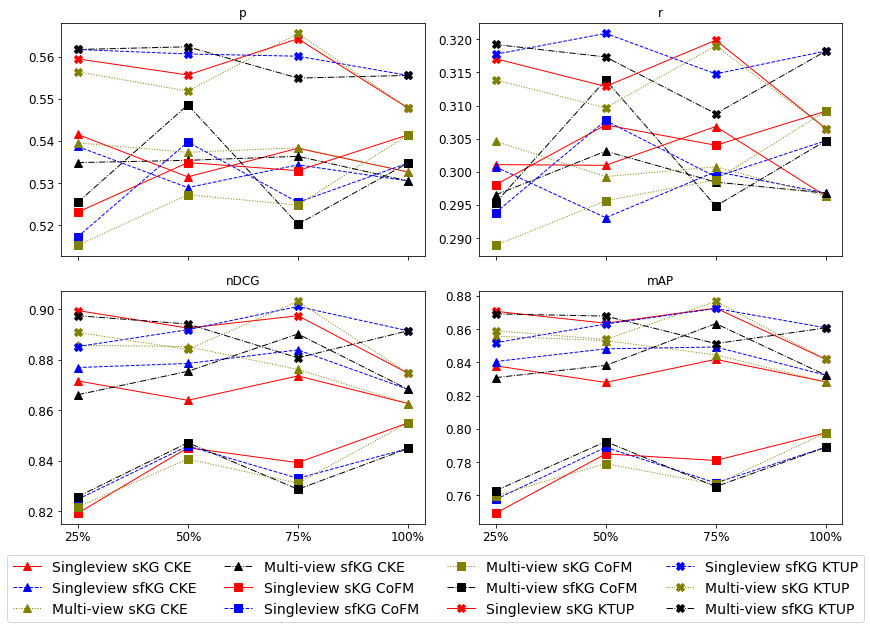

In [36]:
plot_all_results(df_cfkg, df_cke, df_cofm, df_ktup)

In [28]:
def plot_results_rs(df, rs):
    rates = [25,50,75,100]
    xi = df['xi']

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=False, sharey=False, squeeze=False, figsize=(12,10))
    fig.suptitle(rs)
    ax1.plot('xi', 'sv_sfKGs_p', data=df, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="sv-sfKG")
    ax1.plot('xi', 'sv_sKGs_p', data=df, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="sv-sKG")
    ax1.plot('xi', 'mv_sKGs_p', data=df, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2, label="mv-sKG")
    ax1.legend()
    ax1.set_title('p')
    ax1.set(xlabel='rate', ylabel='p', title='p')
    ax1.set_xticks(xi, minor=False)
    ax1.set_xticklabels(rates, fontdict=None, minor=False)
    
    ax2.plot('xi', 'sv_sfKGs_r', data=df, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="sv-sfKG")
    ax2.plot('xi', 'sv_sKGs_r', data=df, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="sv-sKG")
    ax2.plot('xi', 'mv_sKGs_r', data=df, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2, label="mv-sKG")
    ax2.legend()
    ax2.set_title('r')
    ax2.set(xlabel='rate', ylabel='r', title='r')
    ax2.set_xticks(xi, minor=False)
    ax2.set_xticklabels(rates, fontdict=None, minor=False)
    
    ax3.plot('xi', 'sv_sfKGs_ndcg', data=df, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="sv-sfKG")
    ax3.plot('xi', 'sv_sKGs_ndcg', data=df, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="sv-sKG")
    ax3.plot('xi', 'mv_sKGs_ndcg', data=df, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2, label="mv-sKG")
    ax3.legend()
    ax3.set_title('nDCG')
    ax3.set(xlabel='rate', ylabel='nDCG', title='nDCG')
    ax3.set_xticks(xi, minor=False)
    ax3.set_xticklabels(rates, fontdict=None, minor=False)
    
    ax4.plot('xi', 'sv_sfKGs_map', data=df, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="sv-sfKG")
    ax4.plot('xi', 'sv_sKGs_map', data=df, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="sv-sKG")
    ax4.plot('xi', 'mv_sKGs_map', data=df, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2, label="mv-sKG")
    ax4.legend()
    #ax4.set_title('mAP')
    ax4.set(xlabel='rate', ylabel='mAP', title='mAP')
    ax4.set_xticks(xi, minor=False)
    ax4.set_xticklabels(rates, fontdict=None, minor=False)
    
    for ax in fig.get_axes():
        ax.label_outer()
        
    #plt.savefig(f'./Fig7_{rs}.eps', format='eps', dpi=1200)
    
def plot_all_results_rs(df_cfkg, df_cke, df_cofm, df_ktup):
    rates = [25,50,75,100]
    xi = df_cfkg['xi']

    fig, ((ax1, ax2, ax3, ax4), 
          (ax5, ax6, ax7, ax8),
          (ax9, ax10, ax11, ax12),
          (ax13, ax14, ax15, ax16)) = plt.subplots(4, 4, sharex=False,
                                                   sharey=False, squeeze=False,
                                                   figsize=(14,8),
                                                   gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
    
    rs='CFKG'
    df=df_cfkg
    #fig.suptitle('Recommendation quality results')
    ax1.plot('xi', 'sv_sfKGs_p', data=df, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="sv-sfKG")
    ax1.plot('xi', 'sv_sKGs_p', data=df, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="sv-sKG")
    ax1.plot('xi', 'mv_sKGs_p', data=df, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2, label="mv-sKG")
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax1.set_title('p')
    ax1.set_ylabel(rs)
#     ax1.set_xlabel('Rate')
    ax1.legend()
    
    ax2.plot('xi', 'sv_sfKGs_r', data=df, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="sv-sfKG")
    ax2.plot('xi', 'sv_sKGs_r', data=df, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="sv-sKG")
    ax2.plot('xi', 'mv_sKGs_r', data=df, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2, label="mv-sKG")
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax2.set_title('r')
    ax2.set_ylabel(rs)
#     ax2.set_xlabel('Rate')
#     ax2.legend()

    ax3.plot('xi', 'sv_sfKGs_ndcg', data=df, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="sv-sfKG")
    ax3.plot('xi', 'sv_sKGs_ndcg', data=df, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="sv-sKG")
    ax3.plot('xi', 'mv_sKGs_ndcg', data=df, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2, label="mv-sKG")
     # Add some text for labels, title and custom x-axis tick labels, etc.
    ax3.set_title('nDCG')
    ax3.set_ylabel(rs)
#     ax3.set_xlabel('Rate')
#     ax3.legend()

    ax4.plot('xi', 'sv_sfKGs_map', data=df, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="sv-sfKG")
    ax4.plot('xi', 'sv_sKGs_map', data=df, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="sv-sKG")
    ax4.plot('xi', 'mv_sKGs_map', data=df, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2, label="mv-sKG")
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax4.set_title('mAP')
    ax4.set_ylabel(rs)
#     ax4.set_xlabel('Rate')
#     ax4.legend()

    rs='CKE'
    df=df_cke
    ax5.plot('xi', 'sv_sfKGs_p', data=df, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="sv-sfKG")
    ax5.plot('xi', 'sv_sKGs_p', data=df, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="sv-sKG")
    ax5.plot('xi', 'mv_sKGs_p', data=df, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2, label="mv-sKG")
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax5.set_title('p')
    ax5.set_ylabel(rs)
#     ax5.set_xlabel('Rate')
#     ax5.legend()
    
    ax6.plot('xi', 'sv_sfKGs_r', data=df, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="sv-sfKG")
    ax6.plot('xi', 'sv_sKGs_r', data=df, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="sv-sKG")
    ax6.plot('xi', 'mv_sKGs_r', data=df, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2, label="mv-sKG")
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax6.set_title('r')
    ax6.set_ylabel(rs)
#     ax6.set_xlabel('Rate')
#     ax6.legend()

    ax7.plot('xi', 'sv_sfKGs_ndcg', data=df, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="sv-sfKG")
    ax7.plot('xi', 'sv_sKGs_ndcg', data=df, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="sv-sKG")
    ax7.plot('xi', 'mv_sKGs_ndcg', data=df, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2, label="mv-sKG")
     # Add some text for labels, title and custom x-axis tick labels, etc.
    ax7.set_title('nDCG')
    ax7.set_ylabel(rs)
#     ax7.set_xlabel('Rate')
#     ax7.legend()

    ax8.plot('xi', 'sv_sfKGs_map', data=df, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="sv-sfKG")
    ax8.plot('xi', 'sv_sKGs_map', data=df, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="sv-sKG")
    ax8.plot('xi', 'mv_sKGs_map', data=df, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2, label="mv-sKG")
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax8.set_title('mAP')
    ax8.set_ylabel(rs)
#     ax8.set_xlabel('Rate')
#     ax8.legend()
    
    rs='CoFM'
    df=df_cofm
    ax9.plot('xi', 'sv_sfKGs_p', data=df, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="sv-sfKG")
    ax9.plot('xi', 'sv_sKGs_p', data=df, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="sv-sKG")
    ax9.plot('xi', 'mv_sKGs_p', data=df, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2, label="mv-sKG")
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax9.set_title('p')
    ax9.set_ylabel(rs)
#     ax9.set_xlabel('Rate')
#     ax9.legend()
    
    ax10.plot('xi', 'sv_sfKGs_r', data=df, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="sv-sfKG")
    ax10.plot('xi', 'sv_sKGs_r', data=df, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="sv-sKG")
    ax10.plot('xi', 'mv_sKGs_r', data=df, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2, label="mv-sKG")
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax10.set_title('r')
    ax10.set_ylabel(rs)
#     ax10.set_xlabel('Rate')
#     ax10.legend()

    ax11.plot('xi', 'sv_sfKGs_ndcg', data=df, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="sv-sfKG")
    ax11.plot('xi', 'sv_sKGs_ndcg', data=df, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="sv-sKG")
    ax11.plot('xi', 'mv_sKGs_ndcg', data=df, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2, label="mv-sKG")
     # Add some text for labels, title and custom x-axis tick labels, etc.
    ax11.set_title('nDCG')
    ax11.set_ylabel(rs)
#     ax11.set_xlabel('Rate')
#     ax11.legend()

    ax12.plot('xi', 'sv_sfKGs_map', data=df, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="sv-sfKG")
    ax12.plot('xi', 'sv_sKGs_map', data=df, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="sv-sKG")
    ax12.plot('xi', 'mv_sKGs_map', data=df, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2, label="mv-sKG")
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax12.set_title('mAP')
    ax12.set_ylabel(rs)
#     ax12.set_xlabel('Rate')
#     ax12.legend()
    
    rs='KTUP'
    df=df_ktup
    ax13.plot('xi', 'sv_sfKGs_p', data=df, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="sv-sfKG")
    ax13.plot('xi', 'sv_sKGs_p', data=df, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="sv-sKG")
    ax13.plot('xi', 'mv_sKGs_p', data=df, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2, label="mv-sKG")
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax13.set_title('p')
    ax13.set_ylabel(rs)
    ax13.set_xlabel('Rate')
    ax13.set_xticks(xi, minor=False)
    ax13.set_xticklabels(rates, fontdict=None, minor=False)
#     ax13.legend()
    
    ax14.plot('xi', 'sv_sfKGs_r', data=df, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="sv-sfKG")
    ax14.plot('xi', 'sv_sKGs_r', data=df, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="sv-sKG")
    ax14.plot('xi', 'mv_sKGs_r', data=df, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2, label="mv-sKG")
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax14.set_title('r')
    ax14.set_ylabel(rs)
    ax14.set_xlabel('Rate')
    ax14.set_xticks(xi, minor=False)
    ax14.set_xticklabels(rates, fontdict=None, minor=False)
#     ax14.legend()

    ax15.plot('xi', 'sv_sfKGs_ndcg', data=df, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="sv-sfKG")
    ax15.plot('xi', 'sv_sKGs_ndcg', data=df, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="sv-sKG")
    ax15.plot('xi', 'mv_sKGs_ndcg', data=df, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2, label="mv-sKG")
     # Add some text for labels, title and custom x-axis tick labels, etc.
    ax15.set_title('nDCG')
    ax15.set_ylabel(rs)
    ax15.set_xlabel('Rate')
    ax15.set_xticks(xi, minor=False)
    ax15.set_xticklabels(rates, fontdict=None, minor=False)
#     ax15.legend()

    ax16.plot('xi', 'sv_sfKGs_map', data=df, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="sv-sfKG")
    ax16.plot('xi', 'sv_sKGs_map', data=df, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="sv-sKG")
    ax16.plot('xi', 'mv_sKGs_map', data=df, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2, label="mv-sKG")
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax16.set_title('mAP')
    ax16.set_ylabel(rs)
    ax16.set_xlabel('Rate')
    ax16.set_xticks(xi, minor=False)
    ax16.set_xticklabels(rates, fontdict=None, minor=False)
#     ax16.legend()
    
    
    for ax in fig.get_axes():
        ax.label_outer()
        
    #plt.savefig(f'./Fig7.eps', format='eps', dpi=1200)

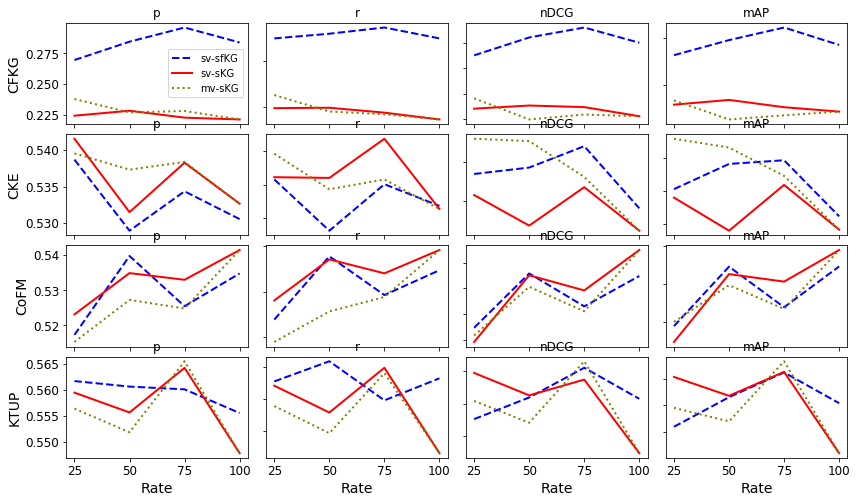

In [70]:
plot_all_results_rs(df_cfkg, df_cke, df_cofm, df_ktup)

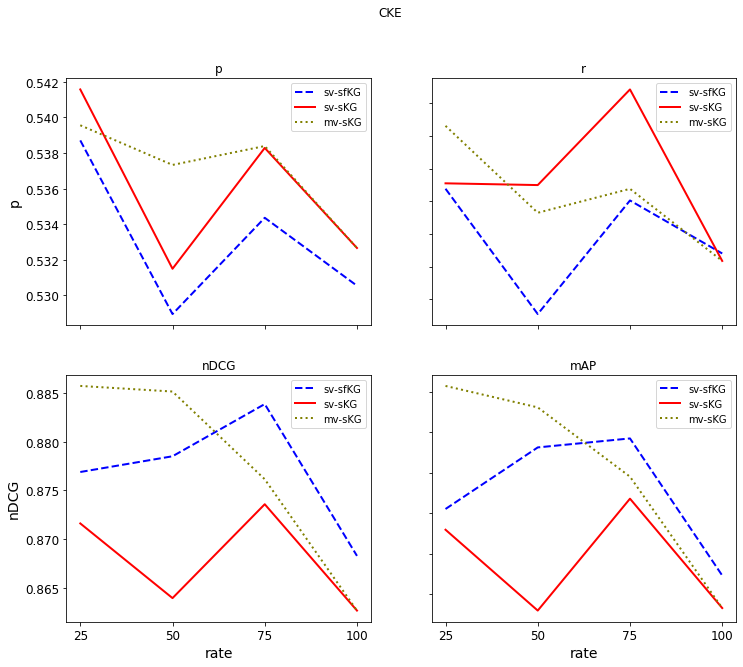

In [71]:
plot_results_rs(df_cke, 'CKE')

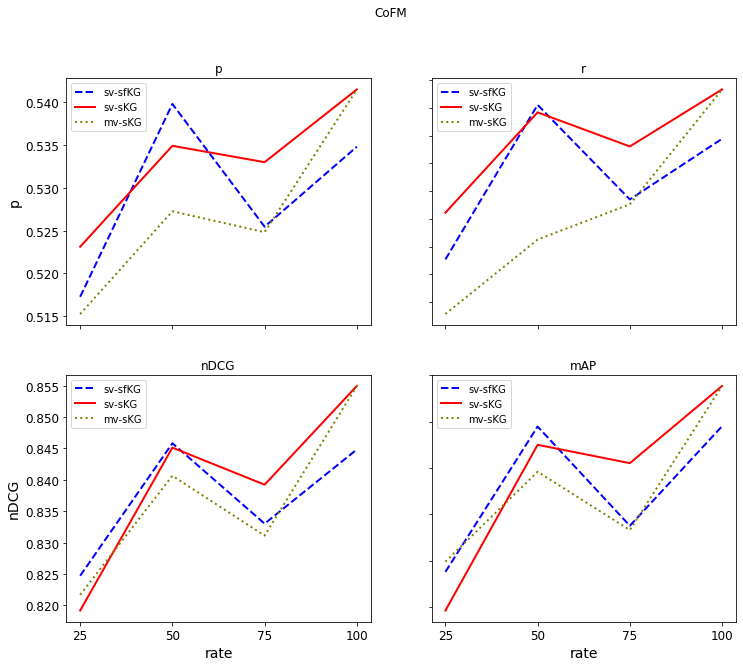

In [72]:
plot_results_rs(df_cofm, 'CoFM')

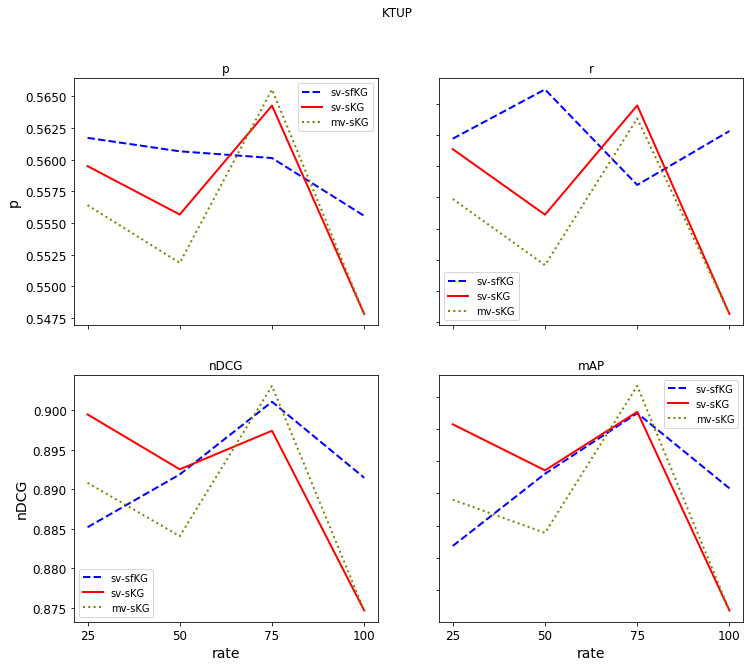

In [73]:
plot_results_rs(df_ktup, 'KTUP')

In [41]:
def plot_results_metric(df_cfkg, df_cke, df_cofm, df_ktup, metric):
    rates = [25,50,75,100]
    xi = df_cfkg['xi']
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=False, sharey=False, squeeze=False, figsize=(12,10))
    
    fig.suptitle(metric)
    ax1.plot('xi', 'sv_sfKGs_'+metric, data=df_cfkg, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="Single-view sfKG")
    ax1.plot('xi', 'sv_sKGs_'+metric, data=df_cfkg, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="Single-view sKG")
    ax1.plot('xi', 'mv_sKGs_'+metric, data=df_cfkg, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2,  label="Multi-view sKG")
    ax1.legend()
    #ax1.set_title('CFKG')
    ax1.set(xlabel='rate', ylabel=metric, title='CFKG')
    ax1.set_xticks(xi, minor=False)
    ax1.set_xticklabels(rates, fontdict=None, minor=False)

    ax2.plot('xi', 'sv_sfKGs_'+metric, data=df_cke, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="Single-view sfKG")
    ax2.plot('xi', 'sv_sKGs_'+metric, data=df_cke, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="Single-view sKG")
    ax2.plot('xi', 'mv_sKGs_'+metric, data=df_cke, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2, label="Multi-view sKG")
    ax2.legend()
    #ax2.set_title('CKE')
    ax2.set(xlabel='rate', ylabel=metric, title='CKE')
    ax2.set_xticks(xi, minor=False)
    ax2.set_xticklabels(rates, fontdict=None, minor=False)

    ax3.plot('xi', 'sv_sfKGs_'+metric, data=df_cofm, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="Single-view sfKG")
    ax3.plot('xi', 'sv_sKGs_'+metric, data=df_cofm, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="Single-view sKG")
    ax3.plot('xi', 'mv_sKGs_'+metric, data=df_cofm, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2, label="Multi-view sKG")
    ax3.legend()
    #ax3.set_title('CoFM')
    ax3.set(xlabel='rate', ylabel=metric, title='CoFM')
    ax3.set_xticks(xi, minor=False)
    ax3.set_xticklabels(rates, fontdict=None, minor=False)

    ax4.plot('xi', 'sv_sfKGs_'+metric, data=df_ktup, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="Single-view sfKG")
    ax4.plot('xi', 'sv_sKGs_'+metric, data=df_ktup, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="Single-view sKG")
    ax4.plot('xi', 'mv_sKGs_'+metric, data=df_ktup, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2, label="Multi-view sKG")
    ax4.legend()
    #ax4.set_title('KTUP')
    ax4.set(xlabel='rate', ylabel=metric, title='KTUP')
    ax4.set_xticks(xi, minor=False)
    ax4.set_xticklabels(rates, fontdict=None, minor=False)

    for ax in fig.get_axes():
        ax.label_outer()
        
    #plt.savefig(f'./Fig6_{metric}.eps', format='eps', dpi=1200)
    
def plot_all_results_metric(df_cfkg, df_cke, df_cofm, df_ktup):
    rates = ['25%','50%','75%','100%']
    xi = df_cfkg['xi']

    fig, ((ax1, ax2, ax3, ax4), 
          (ax5, ax6, ax7, ax8),
          (ax9, ax10, ax11, ax12),
          (ax13, ax14, ax15, ax16)) = plt.subplots(4, 4, sharex=True,
                                                   sharey=False, squeeze=False,
                                                   figsize=(14,10),
                                                   gridspec_kw={'hspace': 0.1, 'wspace': 0.3})
        
    metric='p'
#    fig.suptitle('Recommendation quality results')
    ax1.plot('xi', 'sv_sfKGs_'+metric, data=df_cfkg, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="Single-view sfKG")
    ax1.plot('xi', 'sv_sKGs_'+metric, data=df_cfkg, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="Single-view sKG")
    ax1.plot('xi', 'mv_sKGs_'+metric, data=df_cfkg, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2,  label="Multi-view sKG")
    ax1.plot('xi', 'mv_sfKGs_'+metric, data=df_cfkg, marker='', markersize=8, linestyle='dashdot', color='black', linewidth=2,  label="Multi-view sfKG")
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax1.set_title('CFKG')
    ax1.set_ylabel(metric)
#     ax1.set_xlabel('Rate')
#     ax1.legend()
    plt.setp(ax1.get_xticklabels(), visible=False)

    ax2.plot('xi', 'sv_sfKGs_'+metric, data=df_cke, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="Single-view sfKG")
    ax2.plot('xi', 'sv_sKGs_'+metric, data=df_cke, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="Single-view sKG")
    ax2.plot('xi', 'mv_sKGs_'+metric, data=df_cke, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2, label="Multi-view sKG")
    ax2.plot('xi', 'mv_sfKGs_'+metric, data=df_cke, marker='', markersize=8, linestyle='dashdot', color='black', linewidth=2, label="Multi-view sfKG")
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax2.set_title('CKE')
#     ax2.set_ylabel(metric)
#     ax2.set_xlabel('Rate')
#     ax2.legend()
    plt.setp(ax2.get_xticklabels(), visible=False)

    ax3.plot('xi', 'sv_sfKGs_'+metric, data=df_cofm, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="Single-view sfKG")
    ax3.plot('xi', 'sv_sKGs_'+metric, data=df_cofm, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="Single-view sKG")
    ax3.plot('xi', 'mv_sKGs_'+metric, data=df_cofm, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2, label="Multi-view sKG")
    ax3.plot('xi', 'mv_sfKGs_'+metric, data=df_cofm, marker='', markersize=8, linestyle='dashdot', color='black', linewidth=2, label="Multi-view sfKG")
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax3.set_title('CoFM')
#     ax3.set_ylabel(metric)
#     ax3.set_xlabel('Rate')
#     ax3.legend()
    plt.setp(ax3.get_xticklabels(), visible=False)

    ax4.plot('xi', 'sv_sfKGs_'+metric, data=df_ktup, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="Single-view sfKG")
    ax4.plot('xi', 'sv_sKGs_'+metric, data=df_ktup, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="Single-view sKG")
    ax4.plot('xi', 'mv_sKGs_'+metric, data=df_ktup, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2, label="Multi-view sKG")
    ax4.plot('xi', 'mv_sfKGs_'+metric, data=df_ktup, marker='', markersize=8, linestyle='dashdot', color='black', linewidth=2, label="Multi-view sfKG")
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax4.set_title('KTUP')
#     ax4.set_ylabel(metric)
#     ax4.set_xlabel('Rate')
#     ax4.legend()
    plt.setp(ax4.get_xticklabels(), visible=False)

    metric='r'
    ax5.plot('xi', 'sv_sfKGs_'+metric, data=df_cfkg, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="Single-view sfKG")
    ax5.plot('xi', 'sv_sKGs_'+metric, data=df_cfkg, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="Single-view sKG")
    ax5.plot('xi', 'mv_sKGs_'+metric, data=df_cfkg, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2,  label="Multi-view sKG")
    ax5.plot('xi', 'mv_sfKGs_'+metric, data=df_cfkg, marker='', markersize=8, linestyle='dashdot', color='black', linewidth=2,  label="Multi-view sfKG")
    # Add some text for labels, title and custom x-axis tick labels, etc.
#     ax5.set_title('CFKG')
    ax5.set_ylabel(metric)
#     ax5.set_xlabel('Rate')
#     ax5.legend()

    ax6.plot('xi', 'sv_sfKGs_'+metric, data=df_cke, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="Single-view sfKG")
    ax6.plot('xi', 'sv_sKGs_'+metric, data=df_cke, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="Single-view sKG")
    ax6.plot('xi', 'mv_sKGs_'+metric, data=df_cke, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2, label="Multi-view sKG")
    ax6.plot('xi', 'mv_sfKGs_'+metric, data=df_cke, marker='', markersize=8, linestyle='dashdot', color='black', linewidth=2, label="Multi-view sfKG")
    # Add some text for labels, title and custom x-axis tick labels, etc.
#     ax6.set_title('CKE')
#     ax6.set_ylabel(metric)
#     ax6.set_xlabel('Rate')
#     ax6.legend()

    ax7.plot('xi', 'sv_sfKGs_'+metric, data=df_cofm, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="Single-view sfKG")
    ax7.plot('xi', 'sv_sKGs_'+metric, data=df_cofm, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="Single-view sKG")
    ax7.plot('xi', 'mv_sKGs_'+metric, data=df_cofm, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2, label="Multi-view sKG")
    ax7.plot('xi', 'mv_sfKGs_'+metric, data=df_cofm, marker='', markersize=8, linestyle='dashdot', color='black', linewidth=2, label="Multi-view sfKG")
    # Add some text for labels, title and custom x-axis tick labels, etc.
#     ax7.set_title('CoFM')
#     ax7.set_ylabel(metric)
#     ax7.set_xlabel('Rate')
#     ax7.legend()

    ax8.plot('xi', 'sv_sfKGs_'+metric, data=df_ktup, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="Single-view sfKG")
    ax8.plot('xi', 'sv_sKGs_'+metric, data=df_ktup, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="Single-view sKG")
    ax8.plot('xi', 'mv_sKGs_'+metric, data=df_ktup, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2, label="Multi-view sKG")
    ax8.plot('xi', 'mv_sfKGs_'+metric, data=df_ktup, marker='', markersize=8, linestyle='dashdot', color='black', linewidth=2, label="Multi-view sfKG")
    # Add some text for labels, title and custom x-axis tick labels, etc.
#     ax8.set_title('KTUP')
#     ax8.set_ylabel(metric)
#     ax8.set_xlabel('Rate')
#     ax8.legend()
    
    metric='ndcg'
    ax9.plot('xi', 'sv_sfKGs_'+metric, data=df_cfkg, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="Single-view sfKG")
    ax9.plot('xi', 'sv_sKGs_'+metric, data=df_cfkg, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="Single-view sKG")
    ax9.plot('xi', 'mv_sKGs_'+metric, data=df_cfkg, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2,  label="Multi-view sKG")
    ax9.plot('xi', 'mv_sfKGs_'+metric, data=df_cfkg, marker='', markersize=8, linestyle='dashdot', color='black', linewidth=2,  label="Multi-view sfKG")
    # Add some text for labels, title and custom x-axis tick labels, etc.
#     ax9.set_title('CFKG')
    ax9.set_ylabel(metric)
#     ax9.set_xlabel('Rate')
#     ax9.legend()

    ax10.plot('xi', 'sv_sfKGs_'+metric, data=df_cke, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="Single-view sfKG")
    ax10.plot('xi', 'sv_sKGs_'+metric, data=df_cke, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="Single-view sKG")
    ax10.plot('xi', 'mv_sKGs_'+metric, data=df_cke, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2, label="Multi-view sKG")
    ax10.plot('xi', 'mv_sfKGs_'+metric, data=df_cke, marker='', markersize=8, linestyle='dashdot', color='black', linewidth=2, label="Multi-view sfKG")
    # Add some text for labels, title and custom x-axis tick labels, etc.
#     ax10.set_title('CKE')
#     ax10.set_ylabel(metric)
#     ax10.set_xlabel('Rate')
#     ax10.legend()

    ax11.plot('xi', 'sv_sfKGs_'+metric, data=df_cofm, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="Single-view sfKG")
    ax11.plot('xi', 'sv_sKGs_'+metric, data=df_cofm, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="Single-view sKG")
    ax11.plot('xi', 'mv_sKGs_'+metric, data=df_cofm, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2, label="Multi-view sKG")
    ax11.plot('xi', 'mv_sfKGs_'+metric, data=df_cofm, marker='', markersize=8, linestyle='dashdot', color='black', linewidth=2, label="Multi-view sfKG")
    # Add some text for labels, title and custom x-axis tick labels, etc.
#     ax11.set_title('CoFM')
#     ax11.set_ylabel(metric)
#     ax11.set_xlabel('Rate')
#     ax11.legend()

    ax12.plot('xi', 'sv_sfKGs_'+metric, data=df_ktup, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="Single-view sfKG")
    ax12.plot('xi', 'sv_sKGs_'+metric, data=df_ktup, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="Single-view sKG")
    ax12.plot('xi', 'mv_sKGs_'+metric, data=df_ktup, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2, label="Multi-view sKG")
    ax12.plot('xi', 'mv_sfKGs_'+metric, data=df_ktup, marker='', markersize=8, linestyle='dashdot', color='black', linewidth=2, label="Multi-view sfKG")
    # Add some text for labels, title and custom x-axis tick labels, etc.
#     ax12.set_title('KTUP')
#     ax12.set_ylabel(metric)
#     ax12.set_xlabel('Rate')
#     ax12.legend()
    
    metric='map'
    ax13.plot('xi', 'sv_sfKGs_'+metric, data=df_cfkg, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="Single-view sfKG")
    ax13.plot('xi', 'sv_sKGs_'+metric, data=df_cfkg, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="Single-view sKG")
    ax13.plot('xi', 'mv_sKGs_'+metric, data=df_cfkg, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2,  label="Multi-view sKG")
    ax13.plot('xi', 'mv_sfKGs_'+metric, data=df_cfkg, marker='', markersize=8, linestyle='dashdot', color='black', linewidth=2,  label="Multi-view sfKG")
    # Add some text for labels, title and custom x-axis tick labels, etc.
#     ax13.set_title('CFKG')
    ax13.set_ylabel(metric)
#     ax13.set_xlabel('Rate')
    ax13.set_xticks(xi, minor=False)
    ax13.set_xticklabels(rates, fontdict=None, minor=False)
#     ax13.legend()

    ax14.plot('xi', 'sv_sfKGs_'+metric, data=df_cke, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="Single-view sfKG")
    ax14.plot('xi', 'sv_sKGs_'+metric, data=df_cke, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="Single-view sKG")
    ax14.plot('xi', 'mv_sKGs_'+metric, data=df_cke, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2, label="Multi-view sKG")
    ax14.plot('xi', 'mv_sfKGs_'+metric, data=df_cke, marker='', markersize=8, linestyle='dashdot', color='black', linewidth=2, label="Multi-view sfKG")
    # Add some text for labels, title and custom x-axis tick labels, etc.
#     ax14.set_title('CKE')
#     ax14.set_ylabel(metric)
#     ax14.set_xlabel('Rate')
    ax14.set_xticks(xi, minor=False)
    ax14.set_xticklabels(rates, fontdict=None, minor=False)
#     ax14.legend()

    ax15.plot('xi', 'sv_sfKGs_'+metric, data=df_cofm, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="Single-view sfKG")
    ax15.plot('xi', 'sv_sKGs_'+metric, data=df_cofm, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="Single-view sKG")
    ax15.plot('xi', 'mv_sKGs_'+metric, data=df_cofm, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2, label="Multi-view sKG")
    ax15.plot('xi', 'mv_sfKGs_'+metric, data=df_cofm, marker='', markersize=8, linestyle='dashdot', color='black', linewidth=2, label="Multi-view sfKG")
    # Add some text for labels, title and custom x-axis tick labels, etc.
#     ax15.set_title('CoFM')
#     ax15.set_ylabel(metric)
#     ax15.set_xlabel('Rate')
    ax15.set_xticks(xi, minor=False)
    ax15.set_xticklabels(rates, fontdict=None, minor=False)
#     ax15.legend()

    ax16.plot('xi', 'sv_sfKGs_'+metric, data=df_ktup, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="Single-view sfKG")
    ax16.plot('xi', 'sv_sKGs_'+metric, data=df_ktup, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="Single-view sKG")
    ax16.plot('xi', 'mv_sKGs_'+metric, data=df_ktup, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2, label="Multi-view sKG")
    ax16.plot('xi', 'mv_sfKGs_'+metric, data=df_ktup, marker='', markersize=8, linestyle='dashdot', color='black', linewidth=2, label="Multi-view sfKG")
    # Add some text for labels, title and custom x-axis tick labels, etc.
#     ax16.set_title('KTUP')
#     ax16.set_ylabel(metric)
#     ax16.set_xlabel('Rate')
    ax16.set_xticks(xi, minor=False)
    ax16.set_xticklabels(rates, fontdict=None, minor=False)
#     ax16.legend()

    legend_x = 1.03
    legend_y = -0.45
    ax14.legend(loc='lower center', ncol=4, bbox_to_anchor=(legend_x, legend_y), fontsize=12)
    
#      for ax in fig.get_axes():
#          ax.label_outer()
        
    plt.savefig(f'./Fig6.eps', format='eps', dpi=1200)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


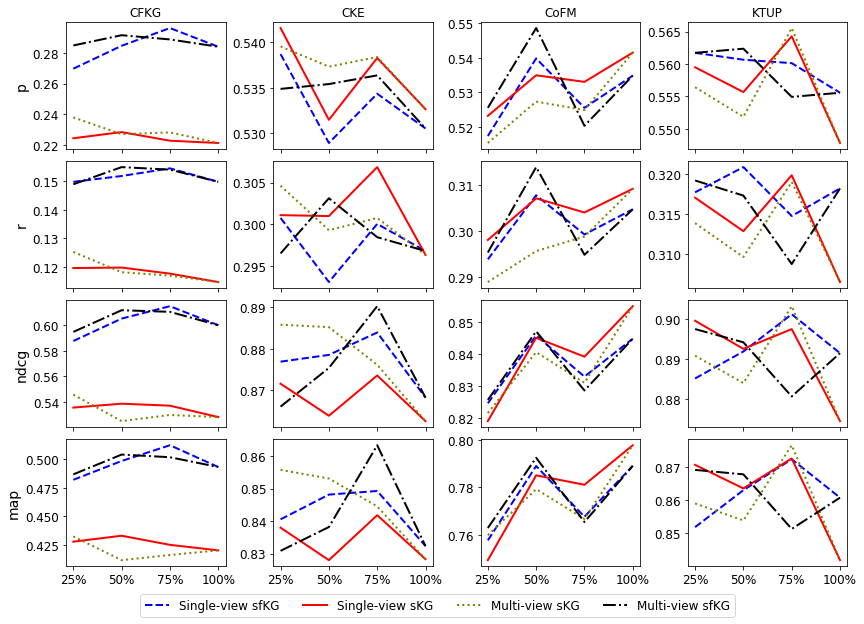

In [42]:
plot_all_results_metric(df_cfkg, df_cke, df_cofm, df_ktup)

In [ ]:
plot_results_metric(df_cfkg, df_cke, df_cofm, df_ktup, 'p')

In [ ]:
plot_results_metric(df_cfkg, df_cke, df_cofm, df_ktup, 'r')

In [ ]:
plot_results_metric(df_cfkg, df_cke, df_cofm, df_ktup, 'ndcg')

In [ ]:
plot_results_metric(df_cfkg, df_cke, df_cofm, df_ktup, 'map')

# 4. Cost results (attempt 1 and 2)

In [5]:
# CFKG Data
df_cost_cfkg_1=pd.DataFrame({'xi': list(range(4)),
                 'sv_sKGs_sec': np.array([4319,5187,4333,4611]),
                 'sv_sfKGs_sec': np.array([3710,4583,6244,4514]),
                 'mv_sKGs_sec': np.array([6266,3645,4678,4611]),
                 'mv_sfKGs_sec': np.array([5112,5273,4516,4514])
                     })

# CKE Data
df_cost_cke_1=pd.DataFrame({'xi': list(range(4)),
                 'sv_sKGs_sec': np.array([12879 ,11120 ,14182 ,9729 ]),
                 'sv_sfKGs_sec': np.array([11681,11931 ,14095 ,11582 ]),
                 'mv_sKGs_sec': np.array([13907 ,12799 ,11963 ,9729 ]),
                 'mv_sfKGs_sec': np.array([12497 ,10866 ,17534 ,11582])
                     })


# CoFM Data
df_cost_cofm_1=pd.DataFrame({'xi': list(range(4)),
                 'sv_sKGs_sec': np.array([7612 ,9976 ,8212 ,9636 ]),
                 'sv_sfKGs_sec': np.array([7646 ,8084 ,8286 ,7830 ]),
                 'mv_sKGs_sec': np.array([7117 ,8728 ,8165 ,9636]),
                 'mv_sfKGs_sec': np.array([7715 ,9676 ,7438 ,7830])
                     })

# KTUP Data
df_cost_ktup_1=pd.DataFrame({'xi': list(range(4)),
                 'sv_sKGs_sec': np.array([10836 ,11210 ,12970 ,10373 ]),
                 'sv_sfKGs_sec': np.array([11005 ,11725 ,11456 ,11625 ]),
                 'mv_sKGs_sec': np.array([11785 ,11323 ,14123 ,10373]),
                 'mv_sfKGs_sec': np.array([13044 ,12586 ,12637 ,11625])
                     })

In [24]:
# CFKG Data
df_cost_cfkg_2=pd.DataFrame({'xi': list(range(4)),
                 'sv_sKGs_sec': np.array([2616,2344,1976,2321]),
                 'sv_sfKGs_sec': np.array([2432,2183,1916,2159]),
                 'mv_sKGs_sec': np.array([2286,2056,2381,2321]),
                 'mv_sfKGs_sec': np.array([1727,2223,2381,2159])
                     })

# CKE Data
df_cost_cke_2=pd.DataFrame({'xi': list(range(4)),
                 'sv_sKGs_sec': np.array([2321,2321,2321,2321]),
                 'sv_sfKGs_sec': np.array([2321,2321,2321,2321]),
                 'mv_sKGs_sec': np.array([2321,2321,2321,2321]),
                 'mv_sfKGs_sec': np.array([2321,2321,2321,2321])
                     })


# CoFM Data
df_cost_cofm_2=pd.DataFrame({'xi': list(range(4)),
                 'sv_sKGs_sec': np.array([2321,2321,2321,2321]),
                 'sv_sfKGs_sec': np.array([2321,2321,2321,2321]),
                 'mv_sKGs_sec': np.array([2321,2321,2321,2321]),
                 'mv_sfKGs_sec': np.array([2321,2321,2321,2321])
                     })

# KTUP Data
df_cost_ktup_2=pd.DataFrame({'xi': list(range(4)),
                 'sv_sKGs_sec': np.array([8501,5084,7579,6808]),
                 'sv_sfKGs_sec': np.array([6112,6356,5698,6749]),
                 'mv_sKGs_sec': np.array([7587,6090,6570,6808]),
                 'mv_sfKGs_sec': np.array([6678,6383,6570,6749])
                     })

In [63]:
def plot_all_costs(df_cost_cfkg_1, df_cost_cfkg_2, df_cost_cke_1, df_cost_cke_2,
                   df_cost_cofm_1, df_cost_cofm_2, df_cost_ktup_1, df_cost_ktup_2):
    rates = ['25%','50%','75%','100%']
    xi = df_cost_cfkg_1['xi']

    fig, ((ax1, ax2, ax3, ax4), 
          (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, sharex=True,
                                                   sharey=False, squeeze=False,
                                                   figsize=(14,8),
                                                   gridspec_kw={'hspace': 0.1, 'wspace': 0.3})
        
    metric='sec'
#    fig.suptitle('Recommendation quality results')
    ax1.plot('xi', 'sv_sKGs_'+metric, data=df_cost_cfkg_1, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="Single-view sKG")
    ax1.plot('xi', 'sv_sfKGs_'+metric, data=df_cost_cfkg_1, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="Single-view sfKG")
    ax1.plot('xi', 'mv_sKGs_'+metric, data=df_cost_cfkg_1, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2,  label="Multi-view sKG")
    ax1.plot('xi', 'mv_sfKGs_'+metric, data=df_cost_cfkg_1, marker='', markersize=8, linestyle='dashdot', color='black', linewidth=2,  label="Multi-view sfKG")
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax1.set_title('CFKG')
    ax1.set_ylabel('Experiment 1')
#     ax1.set_xlabel('Rate')
#     ax1.legend()
    plt.setp(ax1.get_xticklabels(), visible=False)

    ax2.plot('xi', 'sv_sKGs_'+metric, data=df_cost_cke_1, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="Single-view sKG")
    ax2.plot('xi', 'sv_sfKGs_'+metric, data=df_cost_cke_1, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="Single-view sfKG")
    ax2.plot('xi', 'mv_sKGs_'+metric, data=df_cost_cke_1, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2, label="Multi-view sKG")
    ax2.plot('xi', 'mv_sfKGs_'+metric, data=df_cost_cke_1, marker='', markersize=8, linestyle='dashdot', color='black', linewidth=2, label="Multi-view sfKG")
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax2.set_title('CKE')
#     ax2.set_ylabel(metric)
#     ax2.set_xlabel('Rate')
#     ax2.legend()
    plt.setp(ax2.get_xticklabels(), visible=False)

    ax3.plot('xi', 'sv_sKGs_'+metric, data=df_cost_cofm_1, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="Single-view sKG")
    ax3.plot('xi', 'sv_sfKGs_'+metric, data=df_cost_cofm_1, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="Single-view sfKG")
    ax3.plot('xi', 'mv_sKGs_'+metric, data=df_cost_cofm_1, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2, label="Multi-view sKG")
    ax3.plot('xi', 'mv_sfKGs_'+metric, data=df_cost_cofm_1, marker='', markersize=8, linestyle='dashdot', color='black', linewidth=2, label="Multi-view sfKG")
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax3.set_title('CoFM')
#     ax3.set_ylabel(metric)
#     ax3.set_xlabel('Rate')
#     ax3.legend()
    plt.setp(ax3.get_xticklabels(), visible=False)

    ax4.plot('xi', 'sv_sKGs_'+metric, data=df_cost_ktup_1, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="Single-view sKG")
    ax4.plot('xi', 'sv_sfKGs_'+metric, data=df_cost_ktup_1, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="Single-view sfKG")
    ax4.plot('xi', 'mv_sKGs_'+metric, data=df_cost_ktup_1, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2, label="Multi-view sKG")
    ax4.plot('xi', 'mv_sfKGs_'+metric, data=df_cost_ktup_1, marker='', markersize=8, linestyle='dashdot', color='black', linewidth=2, label="Multi-view sfKG")
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax4.set_title('KTUP')
#     ax4.set_ylabel(metric)
#     ax4.set_xlabel('Rate')
#     ax4.legend()
    plt.setp(ax4.get_xticklabels(), visible=False)

    metric='sec'
    ax5.plot('xi', 'sv_sKGs_'+metric, data=df_cost_cfkg_2, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="Single-view sKG")
    ax5.plot('xi', 'sv_sfKGs_'+metric, data=df_cost_cfkg_2, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="Single-view sfKG")
    ax5.plot('xi', 'mv_sKGs_'+metric, data=df_cost_cfkg_2, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2,  label="Multi-view sKG")
    ax5.plot('xi', 'mv_sfKGs_'+metric, data=df_cost_cfkg_2, marker='', markersize=8, linestyle='dashdot', color='black', linewidth=2,  label="Multi-view sfKG")
    # Add some text for labels, title and custom x-axis tick labels, etc.
#     ax5.set_title('CFKG')
    ax5.set_ylabel('Experiment 2')
#     ax5.set_xlabel('Rate')
    ax5.set_xticks(xi, minor=False)
    ax5.set_xticklabels(rates, fontdict=None, minor=False)
#     ax5.legend()

    ax6.plot('xi', 'sv_sKGs_'+metric, data=df_cost_cke_2, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="Single-view sKG")
    ax6.plot('xi', 'sv_sfKGs_'+metric, data=df_cost_cke_2, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="Single-view sfKG")
    ax6.plot('xi', 'mv_sKGs_'+metric, data=df_cost_cke_2, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2, label="Multi-view sKG")
    ax6.plot('xi', 'mv_sfKGs_'+metric, data=df_cost_cke_2, marker='', markersize=8, linestyle='dashdot', color='black', linewidth=2, label="Multi-view sfKG")
    # Add some text for labels, title and custom x-axis tick labels, etc.
#     ax6.set_title('CKE')
#     ax6.set_ylabel(metric)
#     ax6.set_xlabel('Rate')
    ax6.set_xticks(xi, minor=False)
    ax6.set_xticklabels(rates, fontdict=None, minor=False)
#     ax6.legend()

    ax7.plot('xi', 'sv_sKGs_'+metric, data=df_cost_cofm_2, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="Single-view sKG")
    ax7.plot('xi', 'sv_sfKGs_'+metric, data=df_cost_cofm_2, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="Single-view sfKG")
    ax7.plot('xi', 'mv_sKGs_'+metric, data=df_cost_cofm_2, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2, label="Multi-view sKG")
    ax7.plot('xi', 'mv_sfKGs_'+metric, data=df_cost_cofm_2, marker='', markersize=8, linestyle='dashdot', color='black', linewidth=2, label="Multi-view sfKG")
    # Add some text for labels, title and custom x-axis tick labels, etc.
#     ax7.set_title('CoFM')
#     ax7.set_ylabel(metric)
#     ax7.set_xlabel('Rate')
    ax7.set_xticks(xi, minor=False)
    ax7.set_xticklabels(rates, fontdict=None, minor=False)
#     ax7.legend()

    ax8.plot('xi', 'sv_sKGs_'+metric, data=df_cost_ktup_2, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="Single-view sKG")
    ax8.plot('xi', 'sv_sfKGs_'+metric, data=df_cost_ktup_2, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="Single-view sfKG")
    ax8.plot('xi', 'mv_sKGs_'+metric, data=df_cost_ktup_2, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2, label="Multi-view sKG")
    ax8.plot('xi', 'mv_sfKGs_'+metric, data=df_cost_ktup_2, marker='', markersize=8, linestyle='dashdot', color='black', linewidth=2, label="Multi-view sfKG")
    # Add some text for labels, title and custom x-axis tick labels, etc.
#     ax8.set_title('KTUP')
#     ax8.set_ylabel(metric)
#     ax8.set_xlabel('Rate')
    ax8.set_xticks(xi, minor=False)
    ax8.set_xticklabels(rates, fontdict=None, minor=False)
#     ax8.legend()

    legend_x = 1.1
    legend_y = -0.85
    ax6.legend(loc='lower center', bbox_to_anchor=(legend_x, legend_y), fontsize=12)
    fig.subplots_adjust(bottom=0.4)
    
#      for ax in fig.get_axes():
#          ax.label_outer()
        
    plt.savefig(f'./Fig8.eps', format='eps', dpi=1200)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


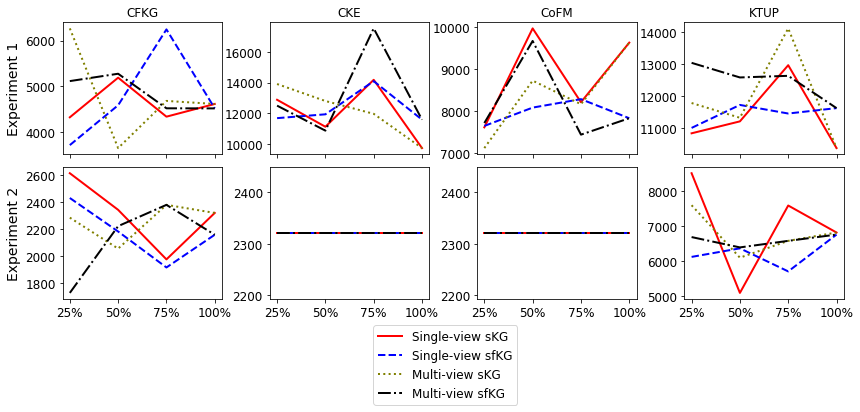

In [64]:
plot_all_costs(df_cost_cfkg_1, df_cost_cfkg_2, df_cost_cke_1, df_cost_cke_2,
                   df_cost_cofm_1, df_cost_cofm_2, df_cost_ktup_1, df_cost_ktup_2)